# Importando as bibliotecas Python para análise e modelagem

In [208]:
import datetime
print(f"Início da execução código em: {datetime.datetime.now()}")

Início da execução código em: 2024-10-16 00:27:48.578575


In [570]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as ticker
import statsmodels.api as sm
!pip install mplfinance
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import cross_val_score
%matplotlib inline
# To pre-process the Dataset
from sklearn.preprocessing import LabelEncoder
# Import the datetime class from the datetime module
from datetime import datetime

In [745]:
# Import the necessary module
import ipywidgets as widgets
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import classification_report
# A troca do valor abaixo pode afetar o valor obtido como acurácia do modelo
# Definindo a seed
seed_value = 100000

# Definir a seed para várias fontes de aleatoriedade
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

#Experimentação prática dos conceitos aprendidos: códigos e testes

## Maiores empresas da índice Ibovespa:
Petrobrás (PETR4), Itaú (ITUB4) e Vale (VALE3)

In [746]:
# Load the IBOVESPA data
df = yf.download('^BVSP', start='2010-01-01', end='2024-07-31', progress=True)
# Load stock market data for major Brazilian companies: Petrobrás, Itaú, and Vale.
df_petrobras = yf.download('PETR3.SA', start='2010-01-01', end='2024-07-31', progress=True)
df_itau = yf.download('ITUB4.SA', start='2010-01-01', end='2024-07-31', progress=True)
df_vale = yf.download('VALE3.SA', start='2010-01-01', end='2024-07-31', progress=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [747]:
df_vale

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,50.189999,51.490002,49.799999,51.490002,22.590563,2381400
2010-01-05,51.540001,52.540001,51.240002,51.970001,22.801155,3001800
2010-01-06,52.000000,53.369999,51.779999,53.070000,23.283760,2742800
2010-01-07,52.509998,53.540001,52.500000,53.290001,23.380283,2543100
2010-01-08,53.299999,54.240002,53.000000,53.810001,23.608433,2444500
...,...,...,...,...,...,...
2024-07-24,60.259998,60.750000,60.209999,60.599998,58.464260,17817300
2024-07-25,60.500000,61.189999,60.259998,60.570000,58.435318,17959500
2024-07-26,61.450001,61.740002,61.009998,61.470001,59.303600,72721200


##Análise exploratória dos dados

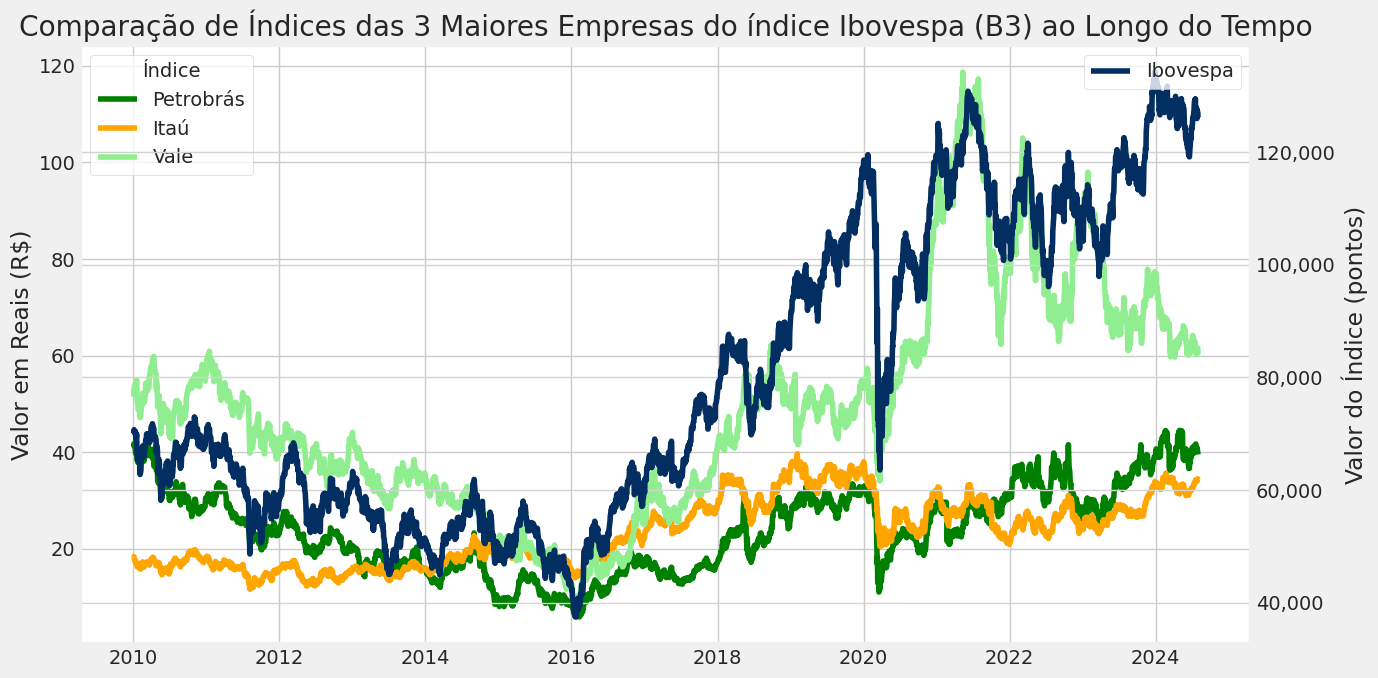

In [748]:
# Concatenando os DataFrames em um único DataFrame
df_big3 = pd.concat([df_petrobras['Close'].rename('Petrobrás'),
                    df_itau['Close'].rename('Itaú'),
                    df_vale['Close'].rename('Vale')], axis=1)

# Configurando o gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(data=df_big3, dashes=False, ax=ax1, palette=['green','orange','lightgreen'])  # Plot df_big3 on the primary y-axis

# Create a secondary y-axis
ax2 = ax1.twinx()

# Add thousands separator to x-axis
ay = plt.gca()  # Get the current Axes object
ay.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))

# Assuming df is your other DataFrame and 'New_Column' is the column to plot
sns.lineplot(data=df, x=df.index, y='Close', color='#032e62', ax=ax2)  # Plot df on the secondary y-axis

# Configurando títulos e rótulos
plt.title('Comparação de Índices das 3 Maiores Empresas do índice Ibovespa (B3) ao Longo do Tempo')
ax1.set_xlabel('')
ax1.set_ylabel('Valor em Reais (R$)')
ax2.set_ylabel('Valor do Índice (pontos)')
plt.xticks(rotation=45)
ax1.legend(title='Índice', loc='upper left')
ax2.legend(['Ibovespa'], loc='upper right')
plt.tight_layout()

# Add grid with light-gray color
plt.grid(color='lightgray')

# Exibindo o gráfico
plt.show()

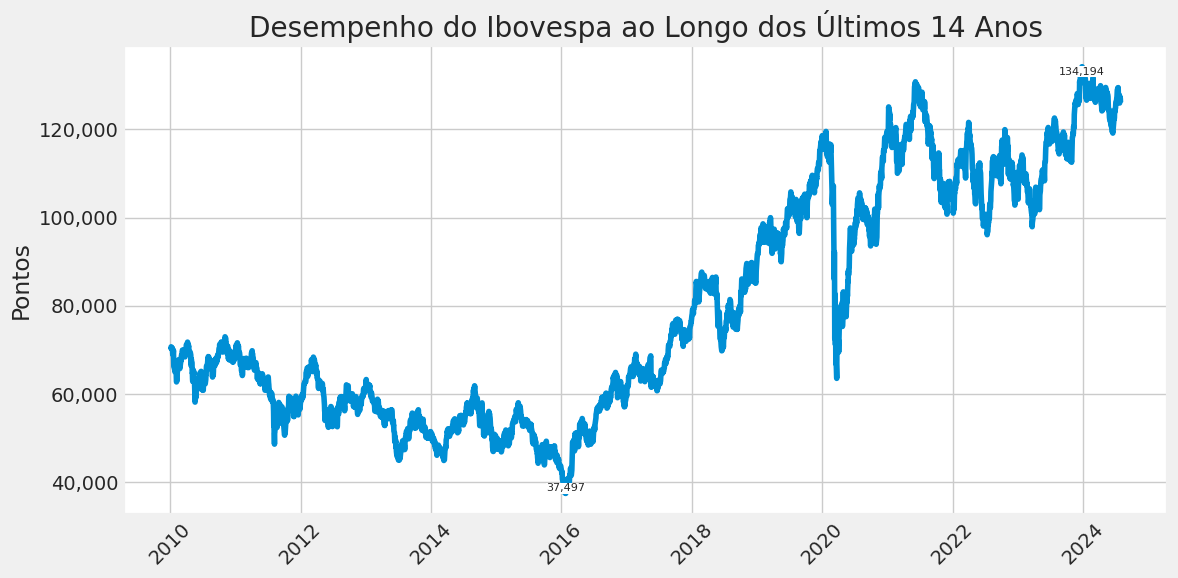

In [749]:
# Criando um DataFrame de exemplo com dados fictícios

# Configurando o gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x=df.index, y='Close') # Changed 'Date' to df.index

# Configurando títulos e rótulos
plt.title('Desempenho do Ibovespa ao Longo dos Últimos 14 Anos')
plt.xlabel('')
plt.ylabel('Pontos')
plt.xticks(rotation=45)

# Add thousands separator to x-axis
ay = plt.gca()  # Get the current Axes object
ay.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))


# Get the lowest and highest values and their corresponding indices
ymin = df['Close'].min()
ymax = df['Close'].max()

# Get the index corresponding to the minimum and maximum 'Close' values
xmin = df['Close'].idxmin()
xmax = df['Close'].idxmax()

# Add data labels for the lowest and highest values
# The original code used 'ax' which is not defined. Replacing it with 'ay' which was defined earlier.
ay.text(xmin, ymin, f'{ymin:,.0f}', ha='center', va='bottom', fontsize=8,
        bbox=dict(facecolor='white', alpha=1, pad=0.3, edgecolor='none')) # Changed ax to ay
ay.text(xmax, ymax, f'{ymax:,.0f}', ha='center', va='top', fontsize=8,
        bbox=dict(facecolor='white', alpha=1, pad=0.3, edgecolor='none')) # Changed ax to ay


plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [750]:
# Create list with the dfs of the 3 biggest companies
df_ibovespa = df
company_list = [df_petrobras, df_itau, df_vale, df_ibovespa]

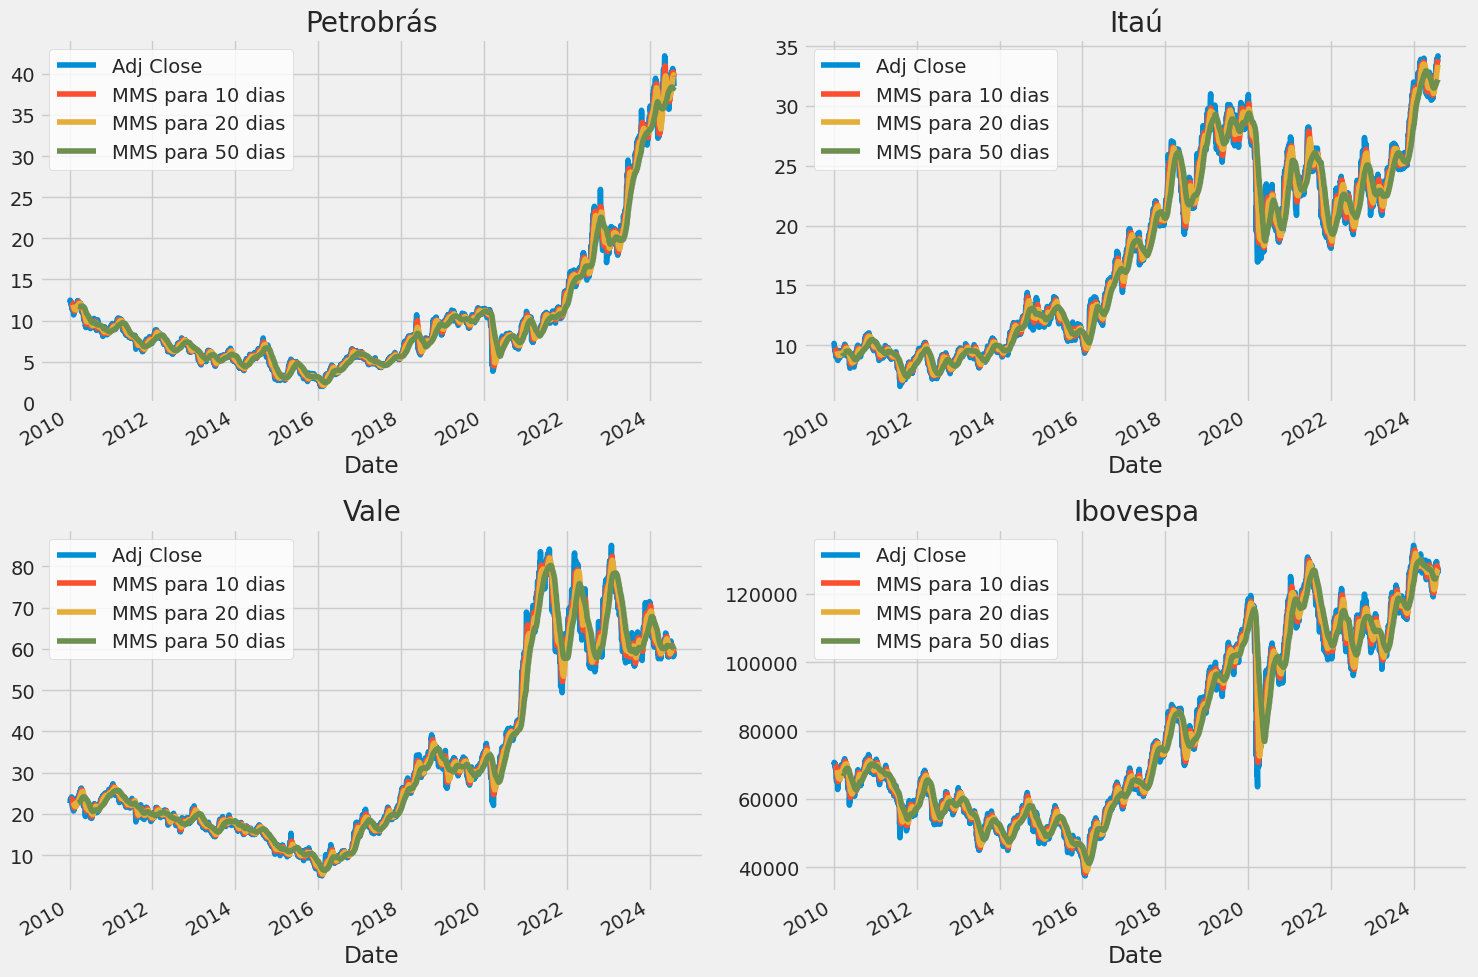

In [751]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MMS para {ma} dias"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

df_petrobras[['Adj Close', 'MMS para 10 dias', 'MMS para 20 dias', 'MMS para 50 dias']].plot(ax=axes[0,0])
axes[0,0].set_title('Petrobrás')

df_itau[['Adj Close', 'MMS para 10 dias', 'MMS para 20 dias', 'MMS para 50 dias']].plot(ax=axes[0,1])
axes[0,1].set_title('Itaú')

df_vale[['Adj Close', 'MMS para 10 dias', 'MMS para 20 dias', 'MMS para 50 dias']].plot(ax=axes[1,0])
axes[1,0].set_title('Vale')

df_ibovespa[['Adj Close', 'MMS para 10 dias', 'MMS para 20 dias', 'MMS para 50 dias']].plot(ax=axes[1,1])
axes[1,1].set_title('Ibovespa')

# Remove background color from all subplots
for ax in axes.flat:
    ax.set_facecolor('none')

fig.tight_layout()

In [752]:
#df_hist

[*********************100%***********************]  4 of 4 completed
<ipython-input-753-d1426042c3df>:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_hist = df_hist.pct_change()


Text(66.58333333333333, 0.5, '')

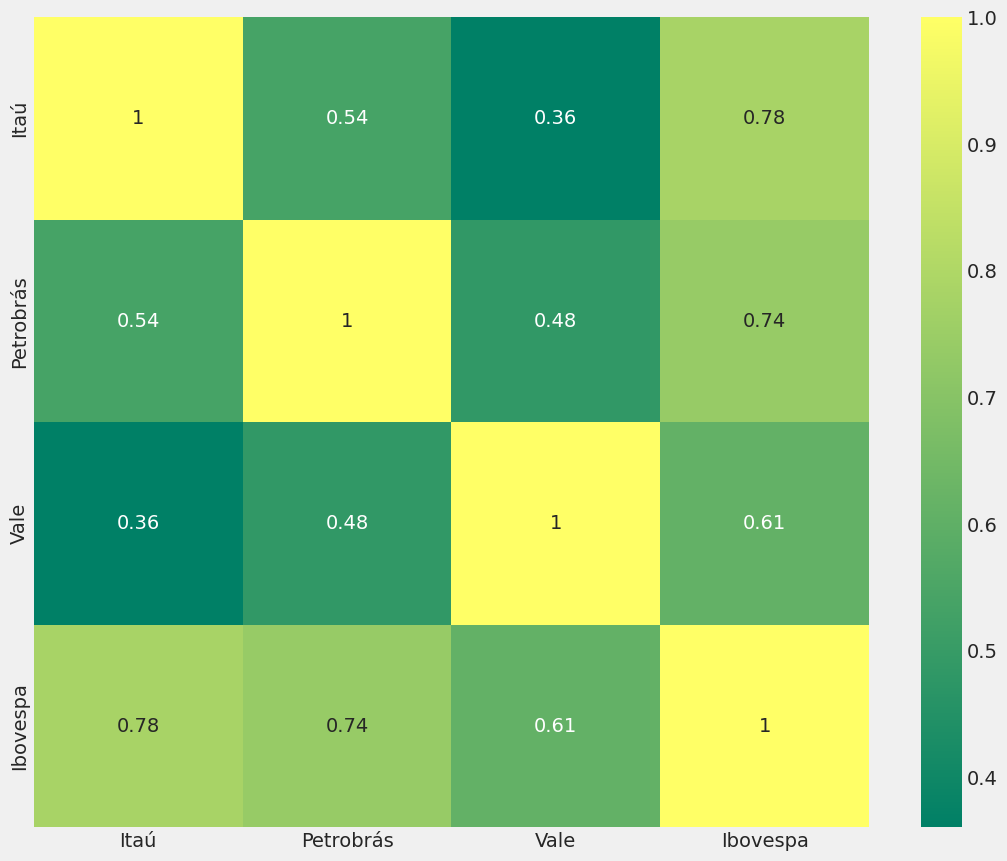

In [753]:
# Grab all the closing prices for the Petrobrás, Itaú, Vale e IBOVESPA
df_all = yf.download(['PETR3.SA','ITUB4.SA','VALE3.SA','^BVSP'], start='2010-01-01', end='2024-07-31')['Adj Close']
df_hist = df_all.rename(columns={'^BVSP': 'Ibovespa',
                                  'PETR3.SA': 'Petrobrás',
                                  'ITUB4.SA': 'Itaú',
                                  'VALE3.SA': 'Vale'
                                  })
# Make a new tech returns DataFrame
df_hist = df_hist.pct_change()
df_hist.head()


plt.figure(figsize=(12, 10))


plt.subplot(1, 1, 1)
sns.heatmap(df_hist.corr(), annot=True, cmap='summer')
# plt.title('Correlação entre o Preço de Fechamento das Três Maiores Empresas e o Índice Ibovespa')
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Tech Challenge

## Alterne entre as bases de dados Yahoo! Finance (padrão) e br.investing via opções de Dataset listadas acima ###

In [754]:
# URL to br.investing database containing IBOVESPA data:
url = 'https://raw.githubusercontent.com/kaulirio/FIAP-Tech-Challenge/refs/heads/main/base_dados_IBOVESPA_investing_2010-2024.csv'
# Load the CSV file into a DataFrame
df_investing = pd.read_csv(url)
# df_investing['Data'] = pd.to_datetime(df_investing['Data'], format='%d.%m.%Y')
df_investing['Data'] = pd.to_datetime(df_investing['Data'], errors='coerce')  # Handle potential errors
df_investing = df_investing.sort_values(by=['Data'], ascending=True)
# Reset the index
df_investing = df_investing.reset_index(drop=True)  # drop=True to avoid old index as a column
# Filter to obtain only start='2010-01-01', end='2024-07-31
df_investing = df_investing[(df_investing['Data'] >= '2010-01-01') & (df_investing['Data'] <= '2024-07-30')]
df_investing = df_investing.rename(columns={'Data': 'Date', 'Último': 'Close', 'Vol.': 'Volume'})  # Rename columns
df_investing.columns

<ipython-input-754-a2a804b80dc1>:6: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_investing['Data'] = pd.to_datetime(df_investing['Data'], errors='coerce')  # Handle potential errors


Index(['Date', 'Close', 'Abertura', 'Máxima', 'Mínima', 'Volume', 'Var%'], dtype='object')

In [755]:
# User can choose between datasets from yahoo finance and
# br.investing (as requested for Tech Challenge Fase 2)

# Create option button for dataset choice
dataset_options = ['Yahoo!-finance', 'br.investing']
dataset_dropdown = widgets.Dropdown(
    options=dataset_options,
    value=dataset_options[0],  # Set default value
    description='Dataset:',
    disabled=False,
)
# Function to handle button click
def on_change(b):
    global df_final # Access global variable

    # Get the selected dataset and column
    dataset_choice = dataset_dropdown.value

    # Update df_final
    if dataset_choice == "Yahoo!-finance":
        df_final = df
    elif dataset_choice == "br.investing":
        df_final = df_investing
        # Execute the JavaScript code
    else:
        print("Opção de conjunto de dados inválida. Por favor, selecione: 'Yahoo!-finance' ou 'br.investing'.")
        df_final = None
        return  # Stop execution if dataset is invalid

# Observe changes in dropdown values
dataset_dropdown.observe(on_change, names='value')

# Display the buttons
display(dataset_dropdown)

# Seleciona a base do Yahoo! finance como padrão
df_final = df

Dropdown(description='Dataset:', options=('Yahoo!-finance', 'br.investing'), value='Yahoo!-finance')

In [756]:
df_investing.columns

Index(['Date', 'Close', 'Abertura', 'Máxima', 'Mínima', 'Volume', 'Var%'], dtype='object')

In [757]:
# Select and Apply the Preferred Dataset (between Yahoo! and br.investing):
# ACTION_REQUIRED: Upon dataset selection change, re-execute this cell and those below
df_final.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'MMS para 10 dias', 'MMS para 20 dias', 'MMS para 50 dias'],
      dtype='object')

### Prosseguindo com o código:

In [758]:
df_final

,Open,High,Low,Close,Adj Close,Volume,MMS para 10 dias,MMS para 20 dias,MMS para 50 dias
Date,,,,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400,NaN,NaN,NaN
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200,NaN,NaN,NaN
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600,NaN,NaN,NaN
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000,NaN,NaN,NaN
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-24,126596.0,126823.0,126218.0,126423.0,126423.0,7304800,128121.3,126895.00,124483.70
2024-07-25,126423.0,126423.0,125626.0,125954.0,125954.0,7134100,127887.3,126977.30,124442.22
2024-07-26,125964.0,127700.0,125953.0,127492.0,127492.0,8272000,127746.8,127156.55,124426.38


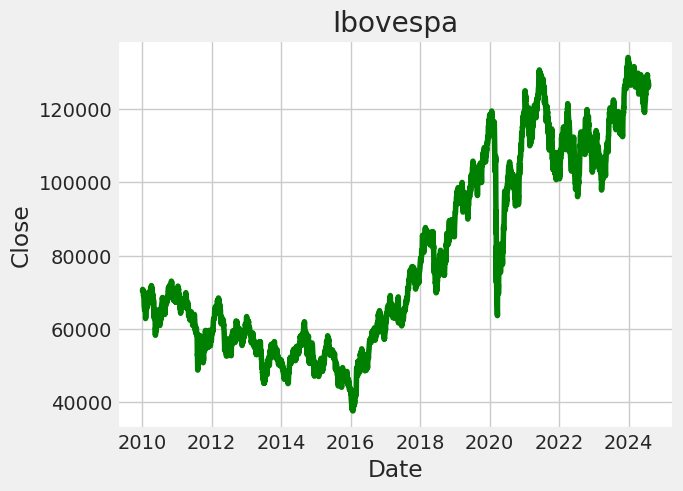

In [759]:
ibovespa = df_final.reset_index()
ibovespa = ibovespa[['Date', 'Close']]

ibovespa.columns = ['ds', 'y']

plt.plot(ibovespa['ds'], ibovespa['y'], label='Actual', c='g')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Ibovespa')
plt.show()

In [760]:
ibovespa_aux = ibovespa
# Before fitting the model, convert 'ds' to int
ibovespa_aux['ds'] = ibovespa_aux['ds'].apply(lambda x: x.toordinal())  # Convert to ordinal integers
ibovespa_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      3610 non-null   int64  
 1   y       3610 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 56.5 KB


In [761]:
X = ibovespa_aux['ds']
y =ibovespa_aux['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [762]:
# Create the neural network model:
model = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)                  # Output layer with a single neuron (for regression)
])

In [763]:
X_train

,ds
3436,738844
1315,735717
1837,736487
829,735002
1847,736502
...,...
1130,735445
1294,735684
860,735046
3507,738950


In [764]:
# Define a custom R2 metric function that works with TensorFlow tensors
def r2_metric(y_true, y_pred):
    """
    Custom R-squared metric for Keras models.

    Args:
        y_true: True values (TensorFlow tensor).
        y_pred: Predicted values (TensorFlow tensor).

    Returns:
        R-squared score (TensorFlow tensor).
    """
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))


# Assuming 'X_train', 'y_train', 'X_test', 'y_test' are defined
# and 'model' is your Keras model

# Compile the model with the custom R2 metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', r2_metric])

# Convert your data to NumPy arrays if they are pandas Series
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

# Fit the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    verbose=1,
    # validation_split=0.1,  # Remove validation_split if you're already using validation_data
    # callbacks=[early_stopping, model_checkpoint],
)

Epoch 1/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5587761664.0000 - mse: 5587761664.0000 - r2_metric: -90.3055 - val_loss: 699396032.0000 - val_mse: 699396032.0000 - val_r2_metric: -22.9999
Epoch 2/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 695416064.0000 - mse: 695416064.0000 - r2_metric: -10.2067 - val_loss: 709349696.0000 - val_mse: 709349696.0000 - val_r2_metric: -24.2765
Epoch 3/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 696848896.0000 - mse: 696848896.0000 - r2_metric: -10.2396 - val_loss: 722866688.0000 - val_mse: 722866688.0000 - val_r2_metric: -25.7621
Epoch 4/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 698042048.0000 - mse: 698042048.0000 - r2_metric: -10.2638 - val_loss: 740355008.0000 - val_mse: 740355008.0000 - val_r2_metric: -27.4510
Epoch 5/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 698987328.0000 - mse: 698987328.0000 - r2_metric: -10.2612 - val_loss: 756477696.0000 - val_mse: 756477696.0000 - val_r2_metric: -28.8653
Epoch 6/

In [765]:
# The second value corresponds to 'mse'
mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 753700288.0


In [766]:
# # Use the trained model to make predictions on new data
y_pred = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


**MSE Metric**

**r2 Metric**

In [767]:
# Define custom R2 metric using TensorFlow
def r2_score(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(y_true - y_pred))
    total = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    r2 = 1 - residual / (total + tf.keras.backend.epsilon())  # Avoid division by zero
    return r2

In [768]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of y_test: (722,)
Shape of y_pred: (722, 1)


In [769]:
y_test_flat = y_test.ravel()  # or y_test.flatten()
y_pred_flat = y_pred.ravel()  # or y_pred.flatten()

# Calculate the R² value for the test set
r2_total = r2_score(y_test_flat, y_pred_flat).numpy()  # Convert Tensor to NumPy

# Print the total R² value
print(f'Total R² value on test set: {r2_total:.4f}')

Total R² value on test set: -0.0935


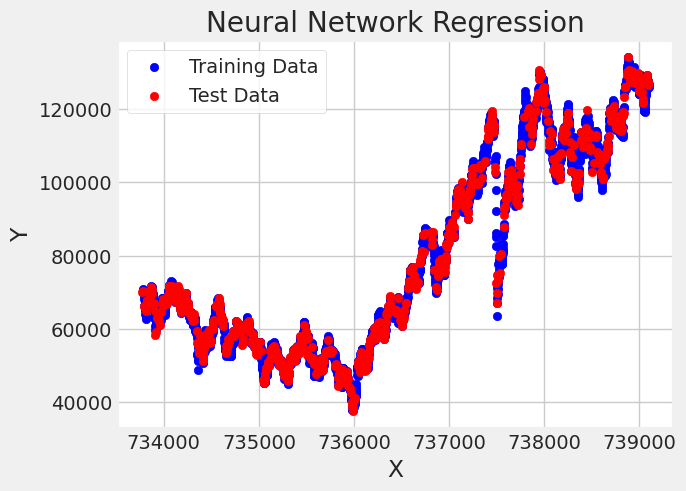

In [770]:
# Visualize the data
# Plot the actual data and model predictions
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

## 1º Teste {Acurácia geral: 0.4780}- Prevê se o último dia da base de dados (a data atual em um cenário real) seria de Alta ou Baixa nas ações da Bovespa (usando: modelos LSTM,  Tensorflow Keras e pre-processando os dados com scikit-learn.


In [771]:
# Library is designed for performing technical analysis of financial data.
try:
  import pandas_ta as ta
except:
  !pip install -q pandas-ta
  import pandas_ta as ta
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

In [772]:
ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      3610 non-null   int64  
 1   y       3610 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 56.5 KB


In [773]:
ibovespa

,ds,y
0,733776,70045.0
1,733777,70240.0
2,733778,70729.0
3,733779,70451.0
4,733780,70263.0
...,...,...
3605,739091,126423.0
3606,739092,125954.0
3607,739093,127492.0
3608,739096,126954.0


In [774]:
ibovespa = df.copy()
ibovespa

,Open,High,Low,Close,Adj Close,Volume,MMS para 10 dias,MMS para 20 dias,MMS para 50 dias
Date,,,,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400,NaN,NaN,NaN
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200,NaN,NaN,NaN
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600,NaN,NaN,NaN
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000,NaN,NaN,NaN
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-24,126596.0,126823.0,126218.0,126423.0,126423.0,7304800,128121.3,126895.00,124483.70
2024-07-25,126423.0,126423.0,125626.0,125954.0,125954.0,7134100,127887.3,126977.30,124442.22
2024-07-26,125964.0,127700.0,125953.0,127492.0,127492.0,8272000,127746.8,127156.55,124426.38


,Open,High,Low,Close,Adj Close,Volume,MMS para 10 dias,MMS para 20 dias,MMS para 50 dias,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,,,,
2010-05-28,62080.0,62247.0,61305.0,61947.0,61947.0,2081600,60517.5,62583.20,66793.78,80.810393,52.288842,43.978784,-61.183653,-97.654688,-140.563516
2010-05-31,61950.0,63047.0,61950.0,63047.0,63047.0,1197600,60535.6,62379.60,66660.78,92.013263,59.399057,48.407290,-38.013805,-77.144143,-115.257063
2010-06-01,63033.0,63033.0,61605.0,61841.0,61841.0,2253800,60635.6,62228.20,66521.02,40.354718,49.889260,44.274897,-46.213365,-83.088538,-125.195560
2010-06-02,61836.0,63198.0,61814.0,62943.0,62943.0,1878400,60961.0,62129.65,66399.04,70.560375,57.195044,48.593358,-30.631264,-70.433295,-109.843752
2010-06-04,62940.0,62940.0,61422.0,61676.0,61676.0,1691000,61309.4,62042.75,66244.82,32.599018,47.839583,44.338914,-43.055201,-78.789295,-122.569972


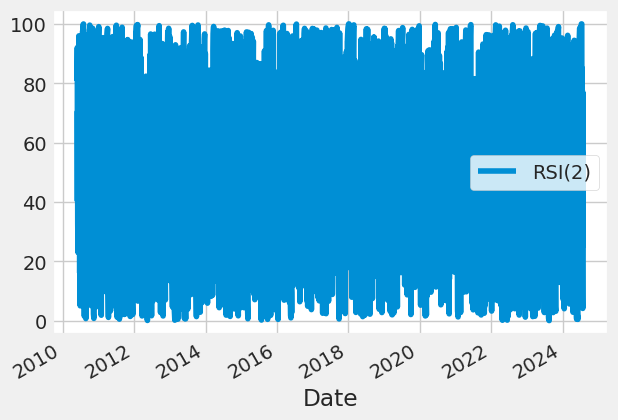

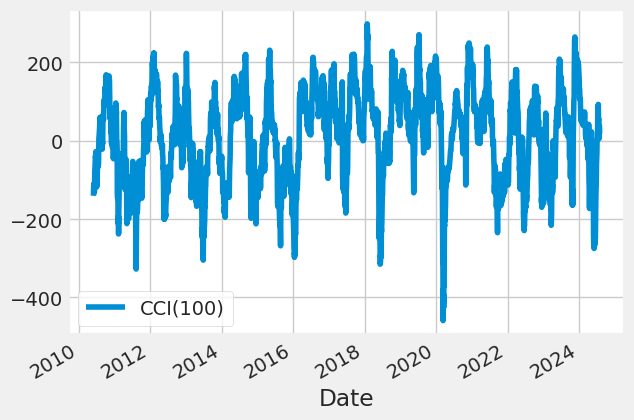

In [775]:
# Creating Technical Analysis Indicators

# Calculate technical indicators
# Add Relative Strength Index (RSI) metrics to the df
# RSI is a momentum oscillator that measures the speed and change of price movements
ibovespa['RSI(2)'] = ta.rsi(ibovespa['Close'], length=2)
ibovespa['RSI(7)'] = ta.rsi(ibovespa['Close'], length=7)
ibovespa['RSI(14)'] = ta.rsi(ibovespa['Close'], length=14)
# Commodity Channel Index (CCI)
# CCI is a momentum-based oscillator that measures the deviation of the price from its average
ibovespa['CCI(30)'] = ta.cci(close=ibovespa['Close'], length=30, high=ibovespa['High'], low=ibovespa['Low'])
ibovespa['CCI(50)'] = ta.cci(close=ibovespa['Close'], length=50, high=ibovespa['High'], low=ibovespa['Low'])
ibovespa['CCI(100)'] = ta.cci(close=ibovespa['Close'], length=100, high=ibovespa['High'], low=ibovespa['Low'])

# Drop NaN values
ibovespa = ibovespa.dropna()

# Create a plot showing some of our indicators
ibovespa.plot(y='RSI(2)')
ibovespa.plot(y='CCI(100)')

# Display the current dataframe
ibovespa.head()

In [776]:
# BUY SIGNAL: Open(-2) > Open(-1), SELL SIGNAL: Open(-2) < Open(-1)
# Indicate if the opening price two days prior was higher than yesterday's opening price
ibovespa['LABEL'] = np.where( ibovespa['Open'].shift(-2).gt(ibovespa['Open'].shift(-1)),"1","0")
ibovespa = ibovespa.dropna()
ibovespa.head()

<ipython-input-776-0f649bfb2278>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibovespa['LABEL'] = np.where( ibovespa['Open'].shift(-2).gt(ibovespa['Open'].shift(-1)),"1","0")


,Open,High,Low,Close,Adj Close,Volume,MMS para 10 dias,MMS para 20 dias,MMS para 50 dias,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),LABEL
Date,,,,,,,,,,,,,,,,
2010-05-28,62080.0,62247.0,61305.0,61947.0,61947.0,2081600,60517.5,62583.20,66793.78,80.810393,52.288842,43.978784,-61.183653,-97.654688,-140.563516,1
2010-05-31,61950.0,63047.0,61950.0,63047.0,63047.0,1197600,60535.6,62379.60,66660.78,92.013263,59.399057,48.407290,-38.013805,-77.144143,-115.257063,0
2010-06-01,63033.0,63033.0,61605.0,61841.0,61841.0,2253800,60635.6,62228.20,66521.02,40.354718,49.889260,44.274897,-46.213365,-83.088538,-125.195560,1
2010-06-02,61836.0,63198.0,61814.0,62943.0,62943.0,1878400,60961.0,62129.65,66399.04,70.560375,57.195044,48.593358,-30.631264,-70.433295,-109.843752,0
2010-06-04,62940.0,62940.0,61422.0,61676.0,61676.0,1691000,61309.4,62042.75,66244.82,32.599018,47.839583,44.338914,-43.055201,-78.789295,-122.569972,0


In [777]:
ibovespa.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'MMS para 10 dias', 'MMS para 20 dias', 'MMS para 50 dias', 'RSI(2)',
       'RSI(7)', 'RSI(14)', 'CCI(30)', 'CCI(50)', 'CCI(100)', 'LABEL'],
      dtype='object')

In [778]:
#Fitting - Indicators and our Labelling
X = ibovespa[['RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)', 'CCI(50)', 'CCI(100)']].values
y = ibovespa['LABEL'].values

# Initial Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initializes a multi-layer perceptron (MLP) neural network for classification.
# 3 hidden layers containing 8 neurons
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
# Train the model
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

print(' Train Data Accuracy ')
print(classification_report(y_train,predict_train))

print( ' Testing Data Accuracy ' )
print( classification_report(y_test,predict_test) )

 Train Data Accuracy 
              precision    recall  f1-score   support

           0       0.56      0.33      0.41      1361
           1       0.54      0.75      0.63      1447

    accuracy                           0.55      2808
   macro avg       0.55      0.54      0.52      2808
weighted avg       0.55      0.55      0.53      2808

 Testing Data Accuracy 
              precision    recall  f1-score   support

           0       0.52      0.29      0.37       356
           1       0.50      0.73      0.59       347

    accuracy                           0.50       703
   macro avg       0.51      0.51      0.48       703
weighted avg       0.51      0.50      0.48       703



[]

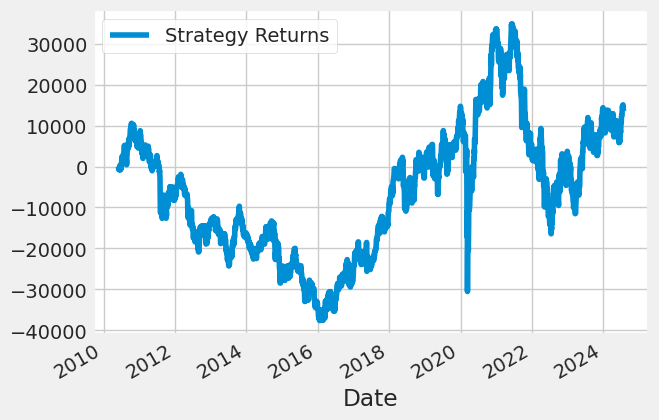

In [779]:
ibovespa_clean = ibovespa

# Remove rows with NaN values after replacing infinities
ibovespa_clean = ibovespa_clean.dropna()

ibovespa_clean['Prediction'] = np.append(predict_train, predict_test)
ibovespa_clean['Strategy Returns'] = np.where(ibovespa_clean['Prediction'].eq("1"), ibovespa_clean['Open'].shift(-2) - ibovespa_clean['Open'].shift(-1), 0)

ibovespa_clean['Strategy Returns'] = ibovespa_clean['Strategy Returns'].cumsum()

ibovespa_clean.plot(y='Strategy Returns')
plt.plot()

In [780]:
prediction = ibovespa_clean.iloc[-1]['Prediction']

last_date_value = ibovespa_clean.index[-1]

if prediction=="1":
  print("A previsão para o último dia de análise do dataset (", last_date_value.strftime('%Y-%m-%d')  , ") é de Alta (UP)")
else:
  print("The forecast for the last day of the dataset (", last_date_value.strftime('%Y-%m-%d')  , ") é de Baixa (DOWN)")

The forecast for the last day of the dataset ( 2024-07-30 ) é de Baixa (DOWN)


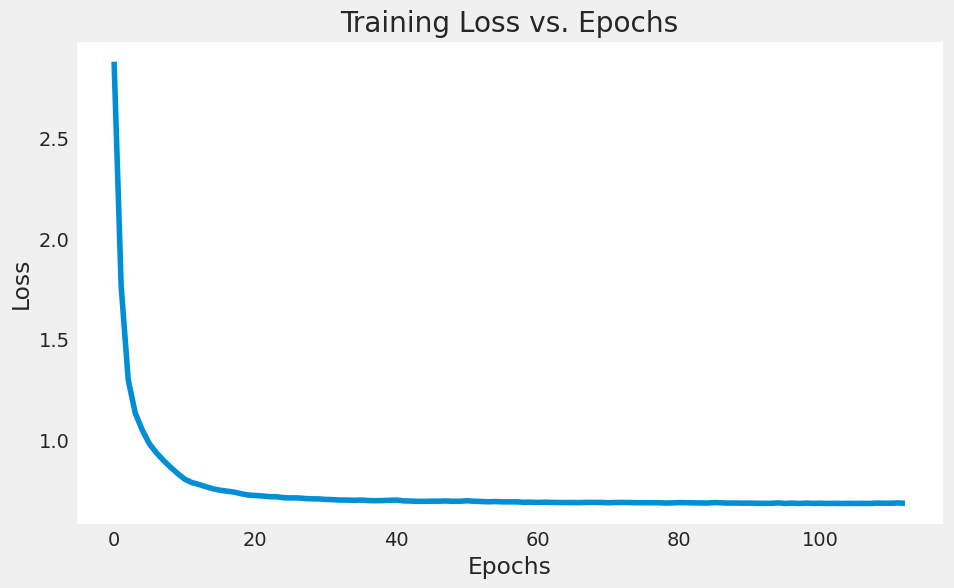

In [781]:
# Plotting the loss curve
# Loss reduction stagnates after 20 epochs (may vary according to each execution)
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_)
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [782]:
test = mlp.loss_curve_
len(test)

113

In [783]:
# Calculate accuracy
# Get the classification report
dict_report = classification_report(y_test, predict_test, output_dict=True)

# Extract the accuracy
total_accuracy = dict_report['accuracy']
print(f"Overall Accuracy: {total_accuracy:.4f}")

Overall Accuracy: 0.5050


In [784]:
import datetime
print(f"Execução total do código terminada em: {datetime.datetime.now()}")

Execução total do código terminada em: 2024-10-16 01:16:15.895059


## 2º Teste {acurácia R² Score: 0.8736} - Long Short-Term Memory [LSTM] - Recurrent neural network (RNN)

In [785]:
#Describe IBOVESPA data retrieved from Finance API
# Remove columns from the 7th column onwards if they exist
if len(df.columns) >= 7:
    df = df.iloc[:, :6]  # Keep only the first 6 column

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3610.000000,3610.00000,3610.000000,3610.000000,3610.000000,3.610000e+03
mean,79669.049030,80397.08892,78945.137119,79682.828255,79682.828255,5.774208e+06
std,26440.214324,26596.40004,26284.872799,26450.811556,26450.811556,4.065697e+06
min,37501.000000,38031.00000,37046.000000,37497.000000,37497.000000,0.000000e+00
25%,56613.750000,57220.00000,56064.750000,56613.750000,56613.750000,2.912325e+06
50%,69345.000000,69937.50000,68779.500000,69374.000000,69374.000000,4.048700e+06
75%,105069.250000,105942.00000,104080.500000,105076.250000,105076.250000,8.598600e+06
max,134194.000000,134392.00000,133832.000000,134194.000000,134194.000000,2.602930e+07


In [786]:
ibovespa = df

In [787]:
# Moving average 5, 10, 20 and 30 days
ma_day = [5, 10, 20, 50]

for ma in ma_day:
  column_name = f"MMS para {ma} dias"
  ibovespa[column_name] = ibovespa['Adj Close'].rolling(ma).mean()

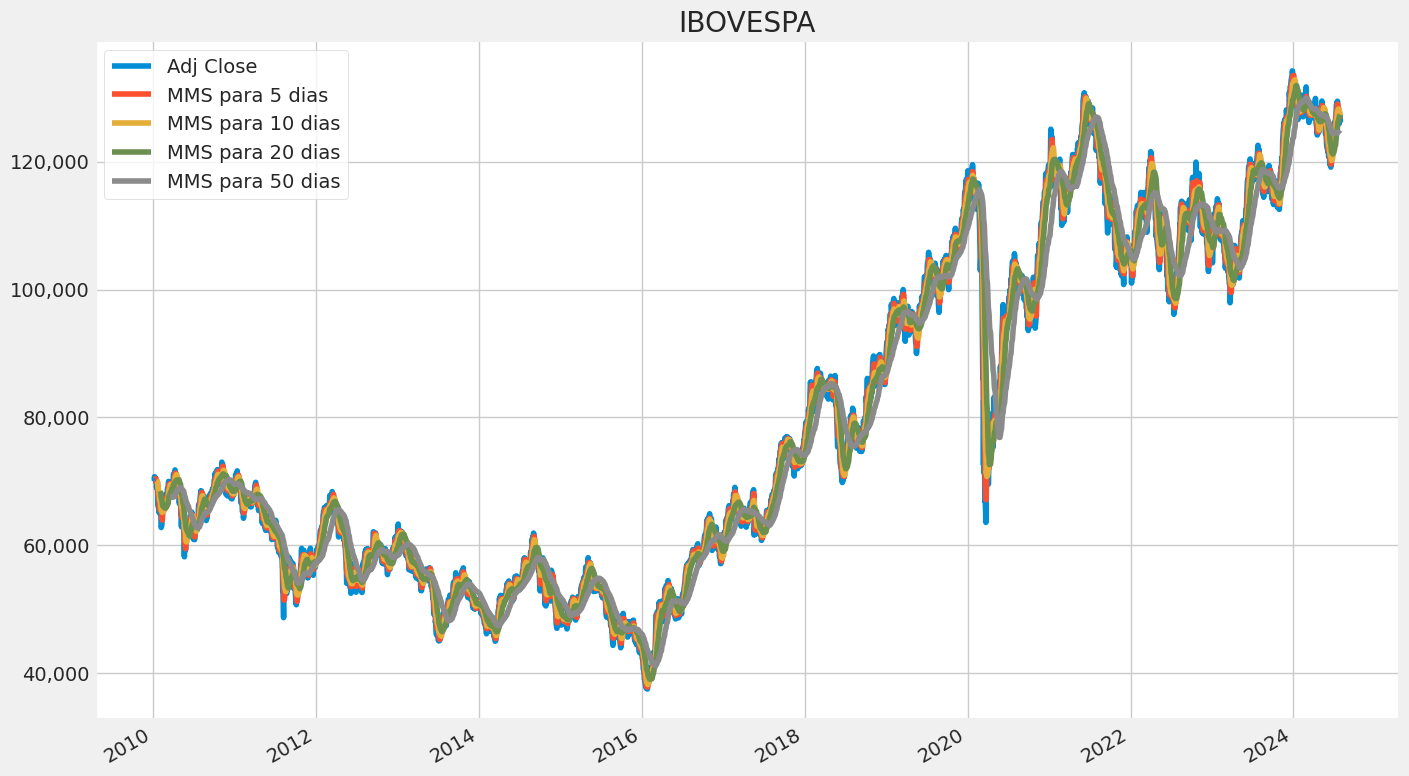

In [788]:
# Plot the data
fig, ax = plt.subplots(figsize=(15, 10))  # Create a single axes object

ibovespa[['Adj Close', 'MMS para 5 dias', 'MMS para 10 dias', 'MMS para 20 dias', 'MMS para 50 dias']].plot(ax=ax)  # Plot on the axes object
ax.set_title('IBOVESPA')
# Add thousands separator to x-axis
ay = plt.gca()  # Get the current Axes object
ay.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
ax.set_xlabel('')
# Apply white background color to all subplots
for ax in axes.flat:
    ax.set_facecolor('white')
plt.show()  # Show the plot

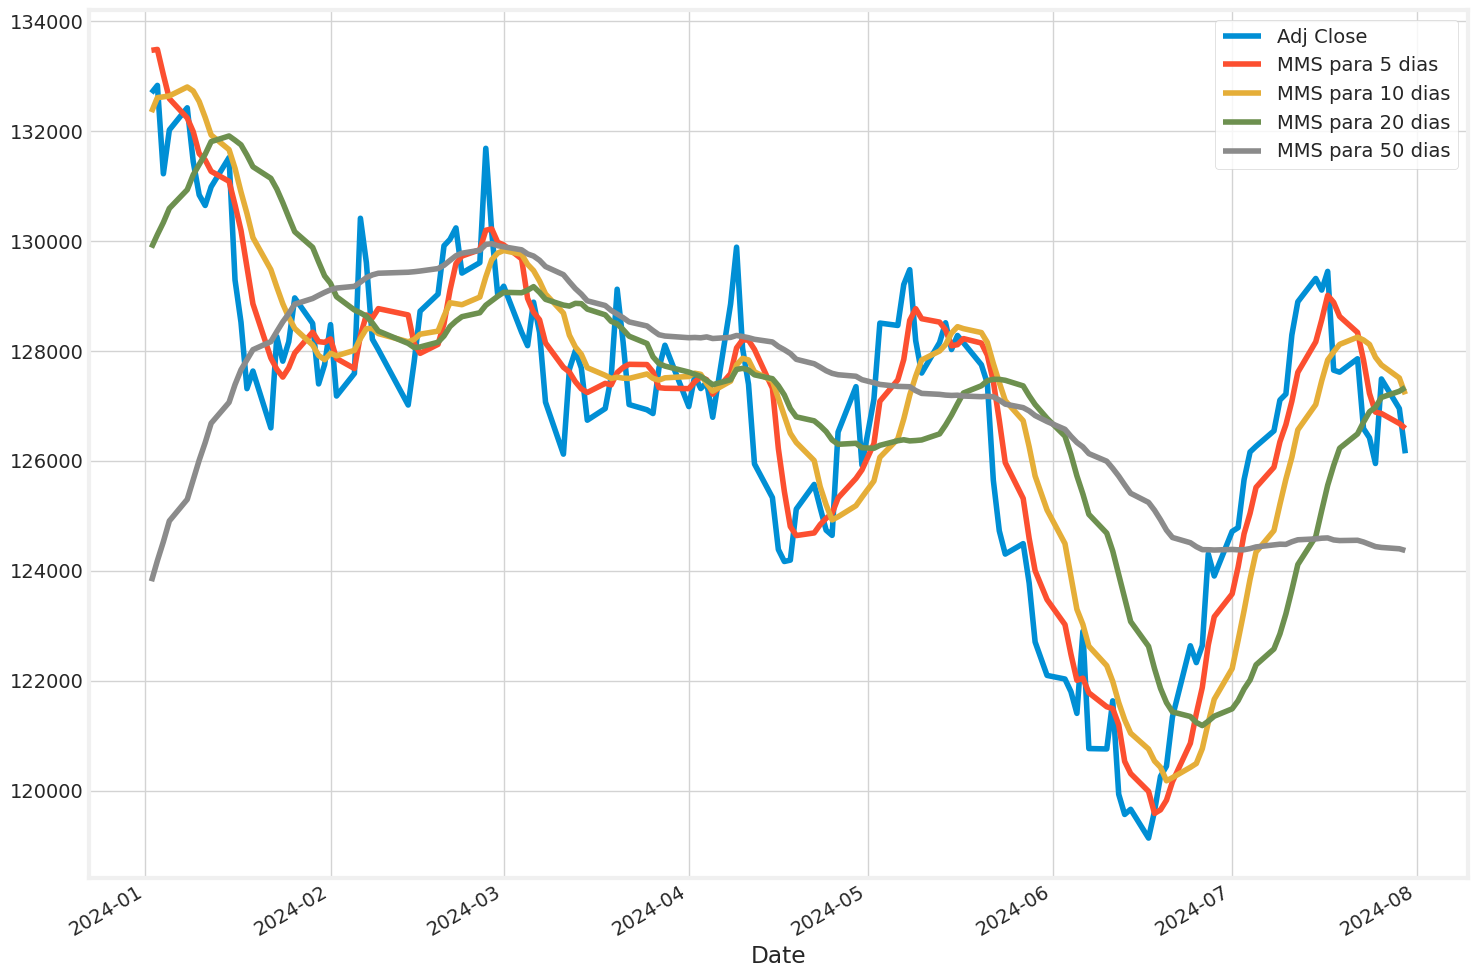

In [789]:
# Filter data for 2024
ibovespa_2024 = ibovespa[ibovespa.index.year == 2024]

# Plot the data
fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')

# Apply white background color to all subplots
# for ax in axes.flat:
    # ax.set_facecolor('white')

ibovespa_2024[['Adj Close', 'MMS para 5 dias', 'MMS para 10 dias', 'MMS para 20 dias', 'MMS para 50 dias']].plot(ax=ax)
ax.set_title('')
ax.grid(True, color='lightgray')  # Remove the grid
ax.set_facecolor('white')  # Set the facecolor of the axes object
fig.patch.set_facecolor('white') # Ensure background color is applied to the figure
plt.tight_layout()

plt.show()

In [790]:
# Capture daily changes - Percentage change for each day
ibovespa['Daily Return'] = ibovespa['Adj Close'].pct_change()

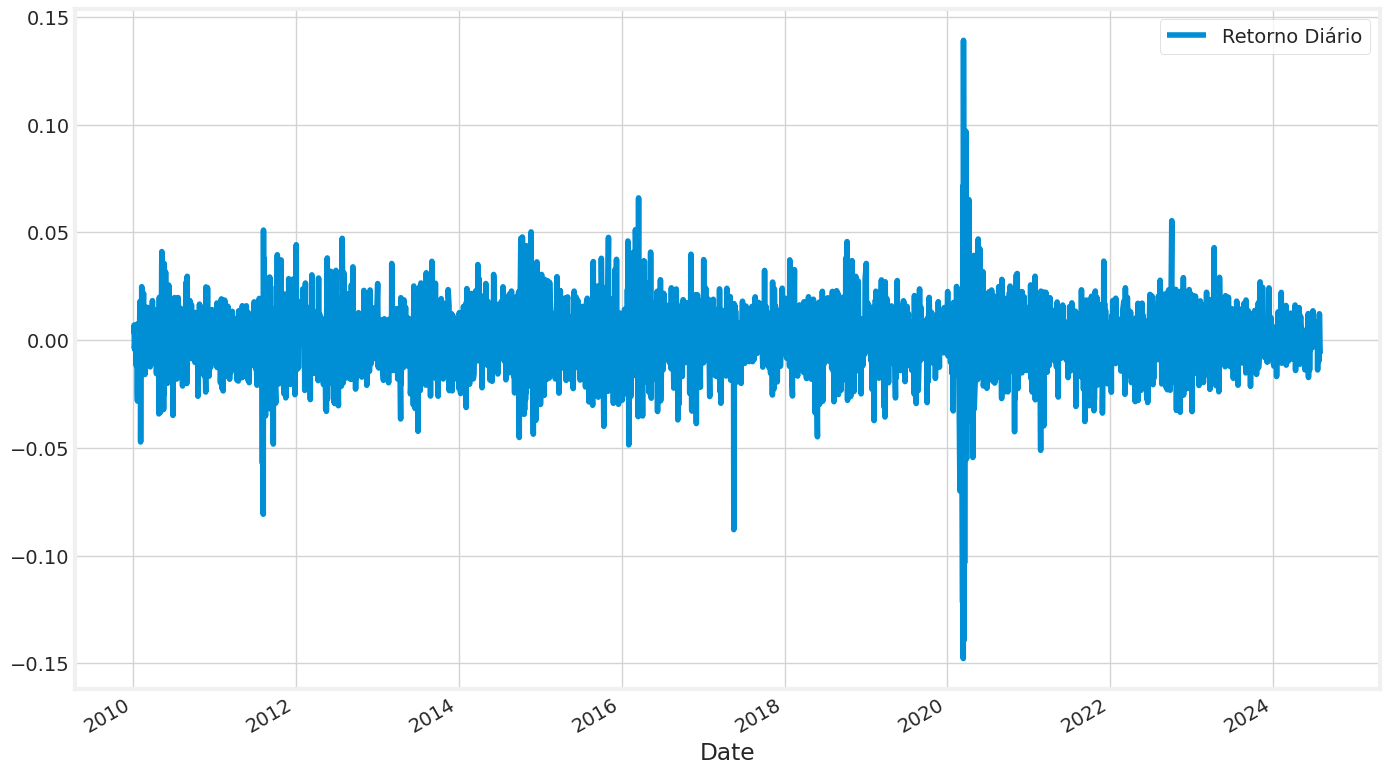

In [791]:
# Plot the data
fig, ax = plt.subplots(figsize=(15, 10),facecolor='white')  # Create a single axes object

ibovespa[['Daily Return']].plot(ax=ax)  # Plot on the axes object
ax.set_title('')
ax.set_facecolor('white')  # Set the facecolor of the axes object
ax.grid(True, color='lightgray')

# Add a custom legend with the desired name
ax.legend(['Retorno Diário'])

plt.show()  # Show the plot

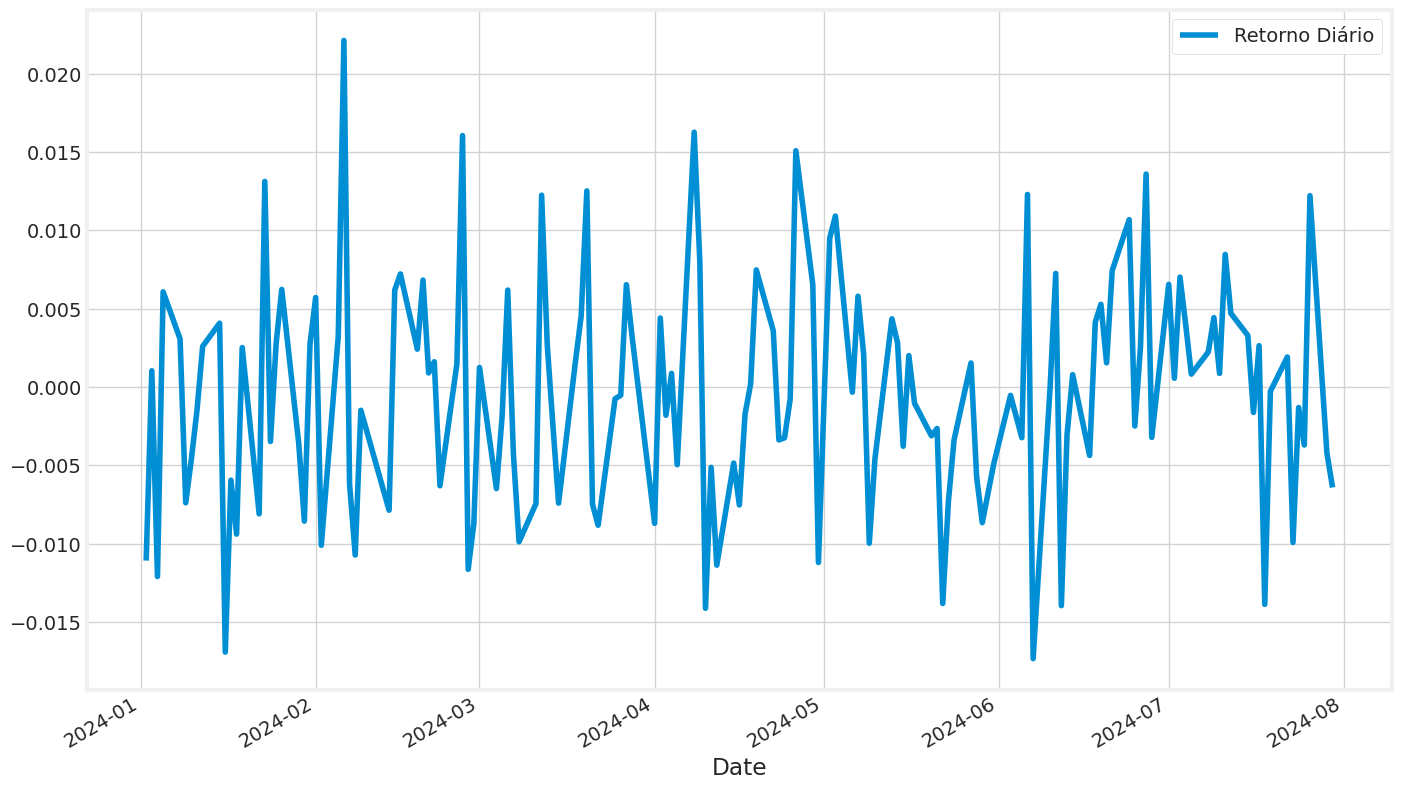

In [792]:
# Filter data for 2024
ibovespa_2024 = ibovespa[ibovespa.index.year == 2024]

# Plot the data
fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')

ibovespa_2024[['Daily Return']].plot(ax=ax)
ax.set_title('')
ax.set_facecolor('white')  # Set the facecolor of the axes object
ax.grid(True, color='lightgray')
ax.legend(['Retorno Diário'])
plt.show()

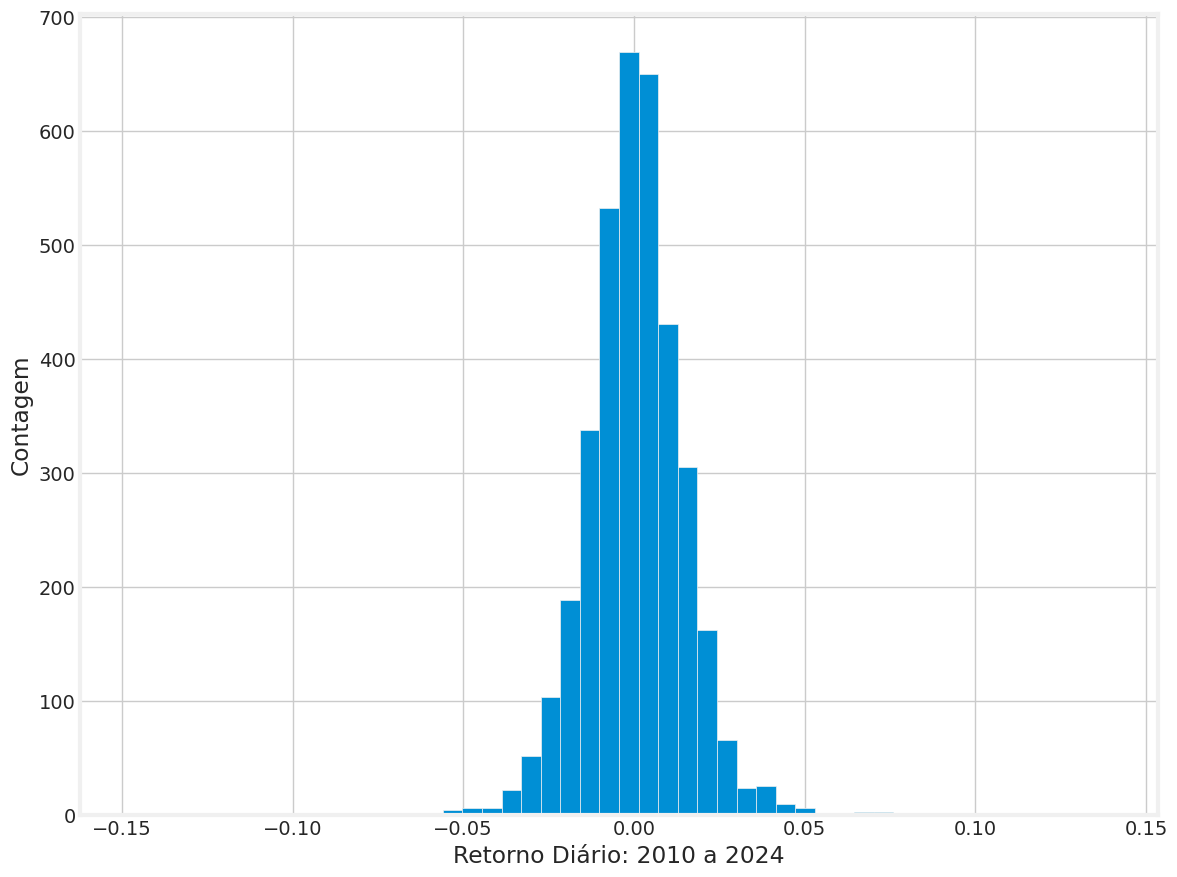

In [793]:
# Histogram showing the average daily return
# Set the default axes background color
plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize=(12, 9), facecolor='white')

ibovespa['Daily Return'].hist(bins=50)


plt.xlabel('Retorno Diário: 2010 a 2024')
plt.ylabel('Contagem')

ax.set_title('')
ax.grid(True, color='lightgray')
ax.set_facecolor=('white')

# Set the background color using the patch
ax.patch.set_facecolor('white')




plt.tight_layout()
plt.show()

In [794]:
# Capture daily changes of the Volume - Percentage change for each day
ibovespa['Daily Return - Volume'] = ibovespa['Volume'].pct_change()

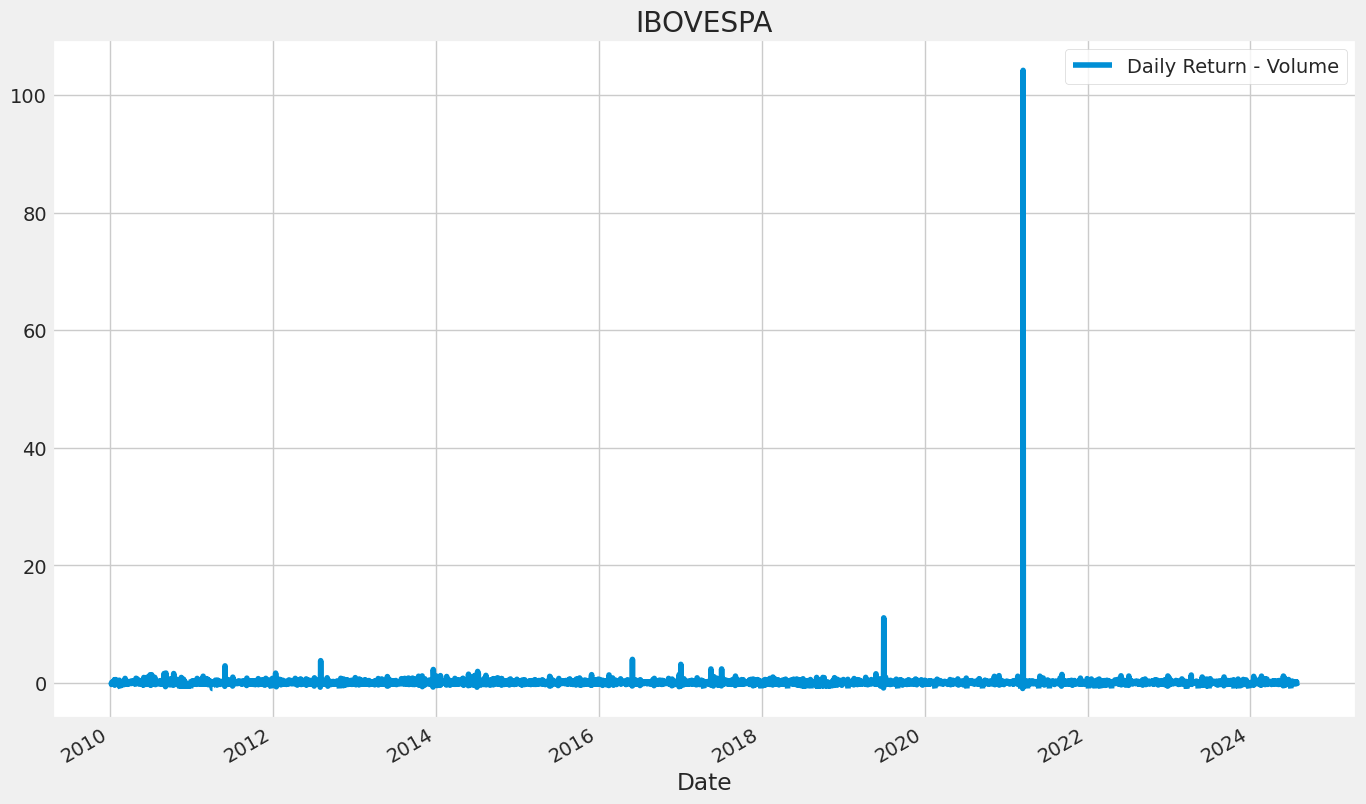

In [795]:
# Plot the data
fig, ax = plt.subplots(figsize=(15, 10))  # Create a single axes object

ibovespa[['Daily Return - Volume']].plot(ax=ax)  # Plot on the axes object
ax.set_title('IBOVESPA')

plt.show()  # Show the plot

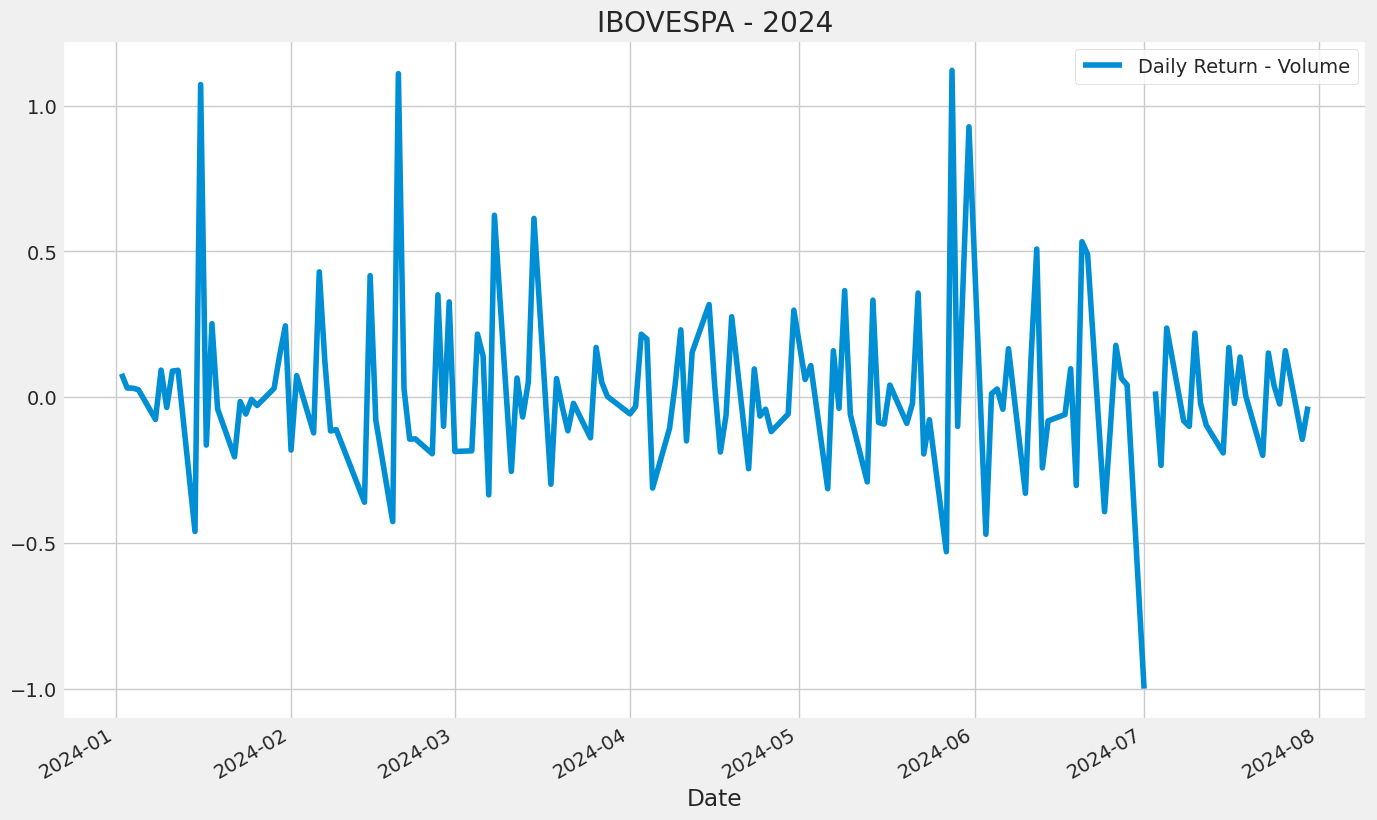

In [796]:
# Filter data for 2024
ibovespa_2024 = ibovespa[ibovespa.index.year == 2024]

# Plot the data
fig, ax = plt.subplots(figsize=(15, 10))

ibovespa_2024[['Daily Return - Volume']].plot(ax=ax)
ax.set_title('IBOVESPA - 2024')

plt.show()

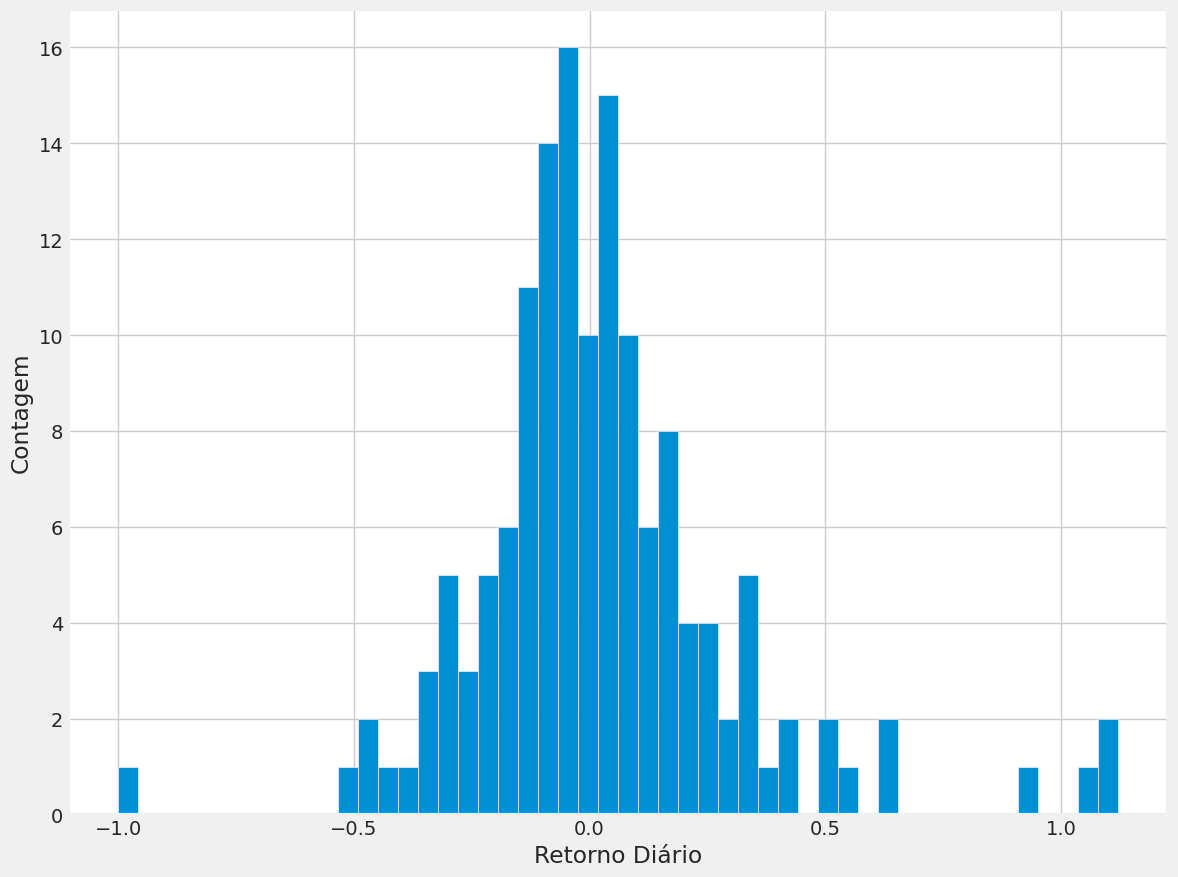

In [797]:
# Histogram showing the average daily return
plt.figure(figsize=(12, 9))

# Replace infinite values with NaN
ibovespa_2024 = ibovespa_2024.replace([np.inf, -np.inf], np.nan)

ibovespa_2024['Daily Return - Volume'].hist(bins=50)
plt.xlabel('Retorno Diário')
plt.ylabel('Contagem')

plt.tight_layout()

In [798]:
# Count infinite values in each column
inf_counts = ibovespa.isin([np.inf, -np.inf]).sum()

# Print the counts
print("Count of infinite values in each column:")
print(inf_counts)

Count of infinite values in each column:
Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
MMS para 5 dias           0
MMS para 10 dias          0
MMS para 20 dias          0
MMS para 50 dias          0
Daily Return              0
Daily Return - Volume    43
dtype: int64


In [799]:
# Load the Dow Jones Industrial Average data
df_dji = yf.download('^DJI', start='2010-01-01', end='2024-07-31', progress=False)

In [800]:
# Capture daily changes of the Volume - Percentage change for each day for Dow-Jones
df_dji['Daily Return'] = df_dji['Adj Close'].pct_change()

In [801]:
# Grab all the closing prices for the IBOVESPA and Dow-Jones into one DataFrame
closing_df = yf.download(['^BVSP','^DJI'], start='2010-01-01', end='2024-07-31')['Adj Close']
closing_df = closing_df.rename(columns={'^BVSP': 'IBOVESPA', '^DJI': 'DOW_JONES'})

# Make a new tech returns DataFrame
ibovespa_dji = closing_df.pct_change()
ibovespa_dji.head()

[*********************100%***********************]  2 of 2 completed
<ipython-input-801-326e88c9a054>:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ibovespa_dji = closing_df.pct_change()


Ticker,IBOVESPA,DOW_JONES
Date,,
2010-01-04 00:00:00+00:00,NaN,NaN
2010-01-05 00:00:00+00:00,0.002784,-0.001128
2010-01-06 00:00:00+00:00,0.006962,0.000157
2010-01-07 00:00:00+00:00,-0.003930,0.003138
2010-01-08 00:00:00+00:00,-0.002669,0.001068


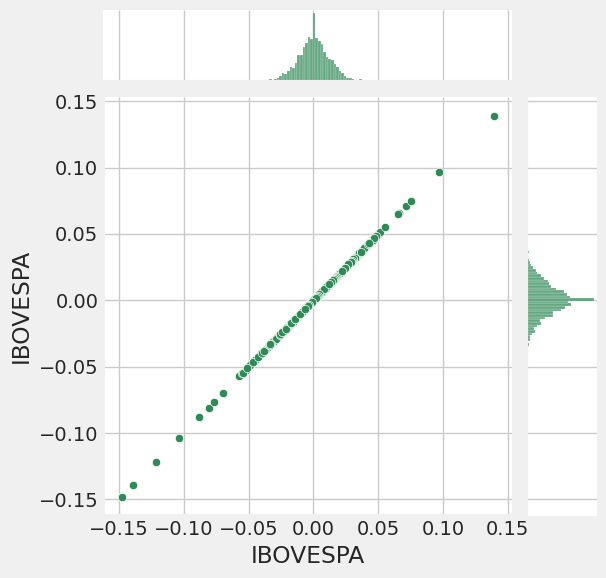

In [802]:
# Comparing IBOVESPA to itself should show a perfectly linear relationship (Correlation)
sns.jointplot(x='IBOVESPA', y='IBOVESPA', data=ibovespa_dji, kind='scatter', color='seagreen')

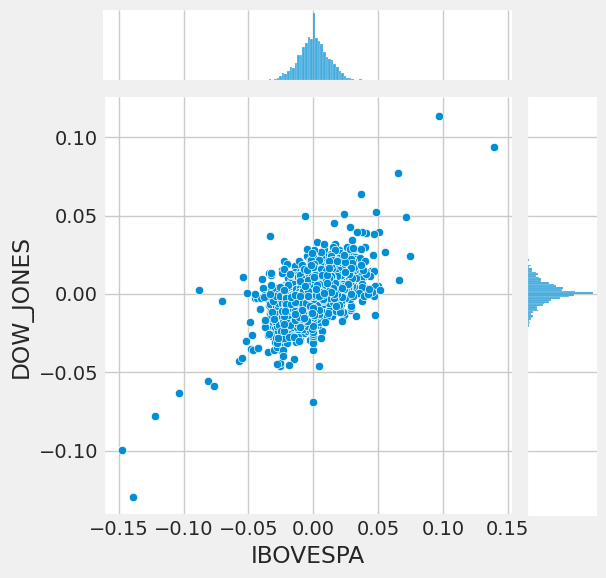

In [803]:
# We'll use joinplot to compare the daily returns of IBOVESPS and Down-Jones (Correlation)
sns.jointplot(x='IBOVESPA',y='DOW_JONES', data=ibovespa_dji, kind='scatter')

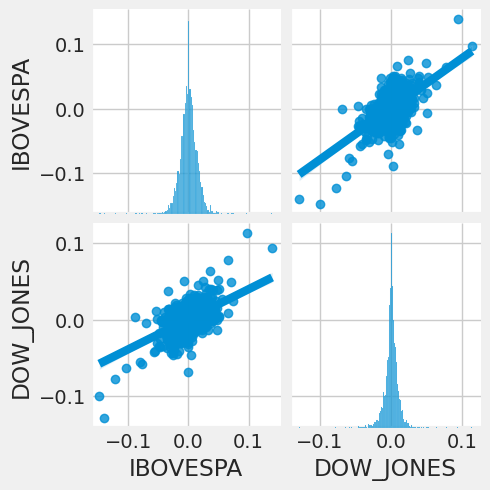

In [804]:
#Pairplot on our DataFrame for an automatic visual analysis
sns.pairplot(ibovespa_dji, kind='reg')

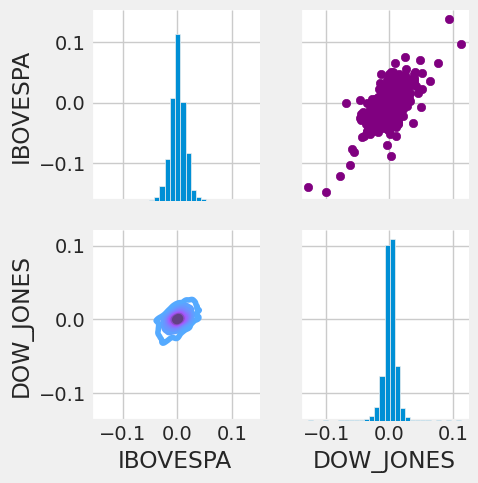

In [805]:
# Show kind of plots: the diagonal, the upper triangle, and the lower triangle.
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(ibovespa_dji.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

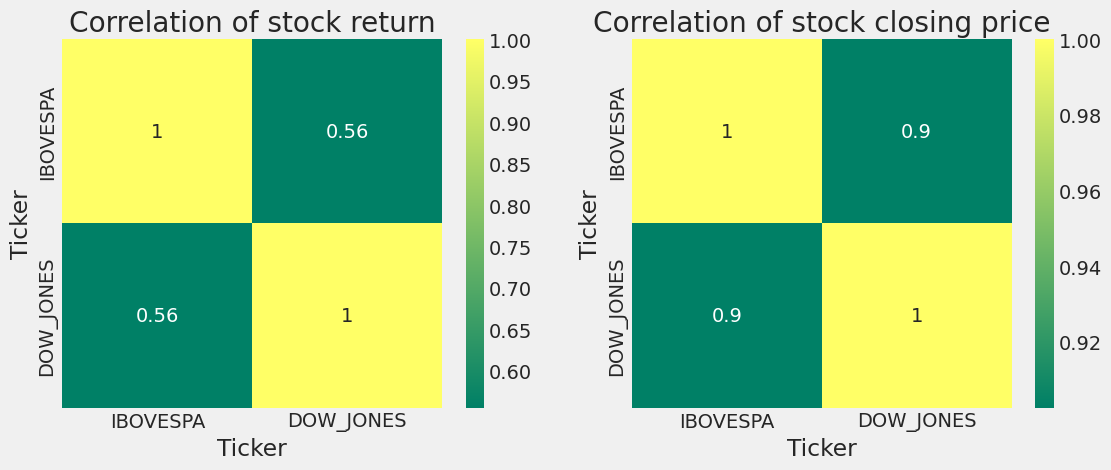

In [806]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(ibovespa_dji.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [807]:
closing_df

Ticker,IBOVESPA,DOW_JONES
Date,,
2010-01-04 00:00:00+00:00,70045.0,10583.959961
2010-01-05 00:00:00+00:00,70240.0,10572.019531
2010-01-06 00:00:00+00:00,70729.0,10573.679688
2010-01-07 00:00:00+00:00,70451.0,10606.860352
2010-01-08 00:00:00+00:00,70263.0,10618.190430
...,...,...
2024-07-24 00:00:00+00:00,126423.0,39853.871094
2024-07-25 00:00:00+00:00,125954.0,39935.070312
2024-07-26 00:00:00+00:00,127492.0,40589.339844


In [808]:
ibovespa_dji

Ticker,IBOVESPA,DOW_JONES
Date,,
2010-01-04 00:00:00+00:00,NaN,NaN
2010-01-05 00:00:00+00:00,0.002784,-0.001128
2010-01-06 00:00:00+00:00,0.006962,0.000157
2010-01-07 00:00:00+00:00,-0.003930,0.003138
2010-01-08 00:00:00+00:00,-0.002669,0.001068
...,...,...
2024-07-24 00:00:00+00:00,-0.001319,-0.012494
2024-07-25 00:00:00+00:00,-0.003710,0.002037
2024-07-26 00:00:00+00:00,0.012211,0.016383


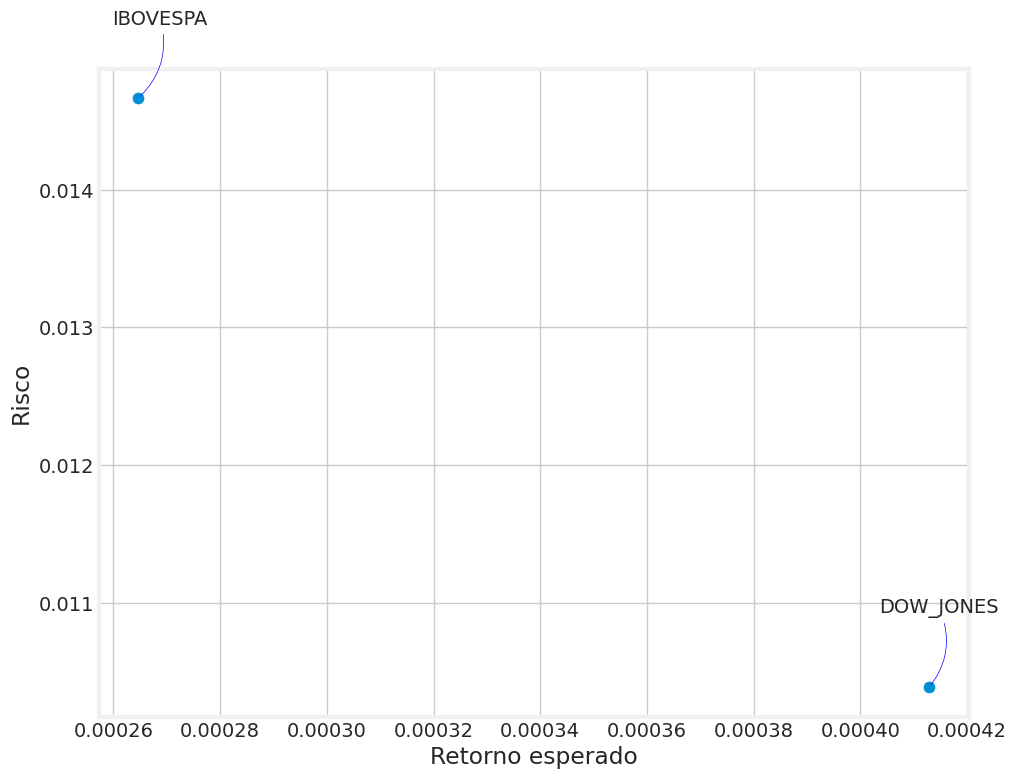

In [809]:
# Assessing the risk
rets = ibovespa_dji.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8), facecolor='white')
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Retorno esperado')
plt.ylabel('Risco')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [810]:
rets.mean()

,0
Ticker,
IBOVESPA,0.000265
DOW_JONES,0.000413


In [811]:
rets.std()

,0
Ticker,
IBOVESPA,0.014665
DOW_JONES,0.010387


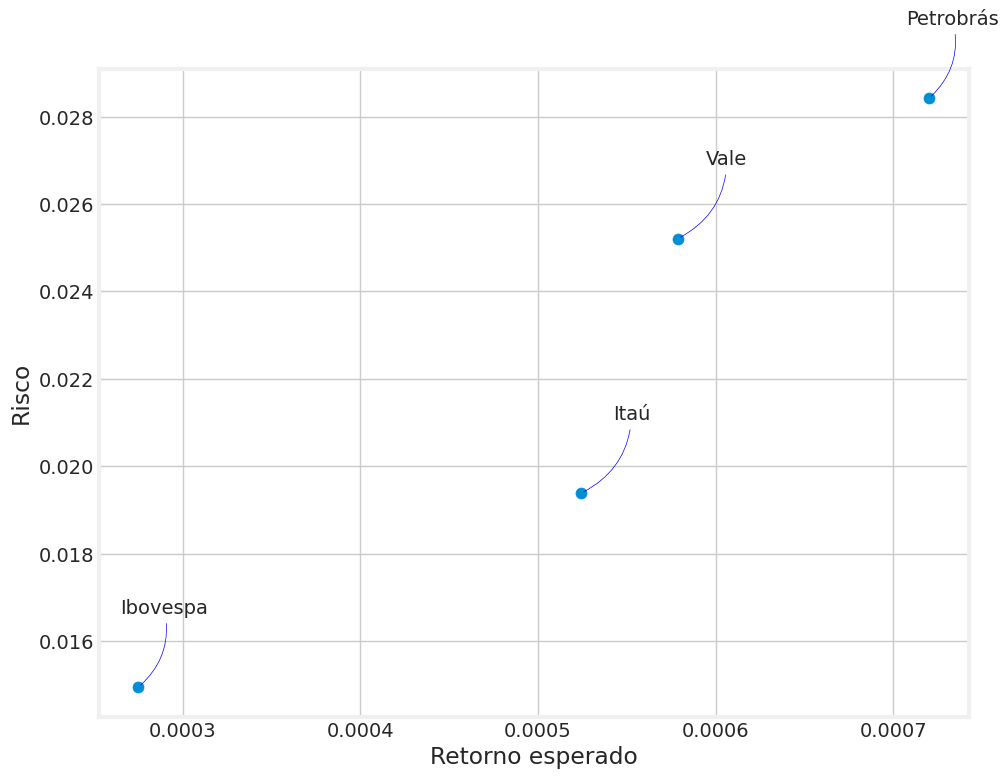

In [812]:
# Assessing the risk for Ibovespa and the other 3 major companies
df_risk = df_hist.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8), facecolor='white')
plt.scatter(df_risk.mean(), df_risk.std(), s=area)
plt.xlabel('Retorno esperado')
plt.ylabel('Risco')

for label, x, y in zip(df_risk.columns, df_risk.mean(), df_risk.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue',
                                 connectionstyle='arc3,rad=-0.3'))

In [813]:
ibovespa_dji

Ticker,IBOVESPA,DOW_JONES
Date,,
2010-01-04 00:00:00+00:00,NaN,NaN
2010-01-05 00:00:00+00:00,0.002784,-0.001128
2010-01-06 00:00:00+00:00,0.006962,0.000157
2010-01-07 00:00:00+00:00,-0.003930,0.003138
2010-01-08 00:00:00+00:00,-0.002669,0.001068
...,...,...
2024-07-24 00:00:00+00:00,-0.001319,-0.012494
2024-07-25 00:00:00+00:00,-0.003710,0.002037
2024-07-26 00:00:00+00:00,0.012211,0.016383


In [814]:
from datetime import datetime # Import the datetime class
# Predicting the closing price stock price of IBOVESPA
# Retrieve the data up to the most recent available date.
df_ibovespa = yf.download(['^BVSP'], start='2010-01-01', end=datetime.now())
df_ibovespa

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.000000,70045.000000,1655400
2010-01-05,70046.0,70595.0,69928.0,70240.000000,70240.000000,1984200
2010-01-06,70237.0,70937.0,70016.0,70729.000000,70729.000000,2243600
2010-01-07,70723.0,70723.0,70045.0,70451.000000,70451.000000,1555000
2010-01-08,70455.0,70766.0,70158.0,70263.000000,70263.000000,1634400
...,...,...,...,...,...,...
2024-10-09,131510.0,131520.0,129719.0,129962.000000,129962.000000,9220400
2024-10-10,129963.0,130418.0,129835.0,130353.000000,130353.000000,7617300
2024-10-11,130354.0,130354.0,129338.0,129992.000000,129992.000000,7973300


In [815]:
# Create a new dataframe with only the 'Close column
data = df_ibovespa.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on - 95% training and 5% for testing
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3482

In [816]:
# Scale the data
#  Scikit-learn library: Machine learning and data preprocessing tasks
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.32597875],
       [0.32793174],
       [0.33282923],
       ...,
       [0.92636734],
       [0.93651286],
       [0.93689619]])

In [817]:
#train_data

In [818]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# Captures a sequence of 60 previous time steps to predict the next value.
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.32597875, 0.32793174, 0.33282923, 0.33004497, 0.32816209,
       0.32986469, 0.32628922, 0.32938396, 0.32353501, 0.3152924 ,
       0.31952888, 0.32461666, 0.30750048, 0.2881709 , 0.28767014,
       0.28069947, 0.27615251, 0.28134045, 0.2794776 , 0.29119553,
       0.29711459, 0.29657376, 0.26477511, 0.25304716, 0.25695314,
       0.27262712, 0.27596222, 0.28675874, 0.28401454, 0.29833645,
       0.3038549 , 0.30146124, 0.29732491, 0.28654842, 0.28341362,
       0.28667862, 0.29050447, 0.29776558, 0.30328402, 0.30190191,
       0.30364458, 0.31398039, 0.31125622, 0.32128156, 0.32531774,
       0.3243763 , 0.31892796, 0.3157531 , 0.32494717, 0.32275381,
       0.32249341, 0.31380011, 0.31593338, 0.31938866, 0.3146414 ,
       0.30992418, 0.31233788, 0.32491712, 0.32512744, 0.32925376])]
[0.3369054653620039]

[array([0.32597875, 0.32793174, 0.33282923, 0.33004497, 0.32816209,
       0.32986469, 0.32628922, 0.32938396, 0.32353501, 0.3152924 ,
       0.31952888, 0.32461666, 0.307

In [819]:
x_train.shape

(3422, 60, 1)

In [820]:
# Keras library: High-level neural networks API built on top of TensorFlow
# Build the LSTM model
model = Sequential()
# Layer will return the entire sequence of outputs for each input, necessary when stacking LSTM layers
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# Layer only returns the final output (not the entire sequence).
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25)) #Prediction layer
model.add(Dense(1)) #Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
# batch_size=1: The model updates its weights after processing each sample,
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3422/3422 ━━━━━━━━━━━━━━━━━━━━ 177s 51ms/step - loss: 0.0049


In [821]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
# Contains the actual closing prices (unscaled)
y_test = dataset[training_data_len:, :]
# Loop creates input sequences for testing by appending 60-day windows of data
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data into a 3D array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
# Makes predictions on the x_test sequences
predictions = model.predict(x_test)
# Transform the predictions back to their original scale (real closing prices)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


1450.0466002764713

<ipython-input-822-7e3c9cd6b123>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


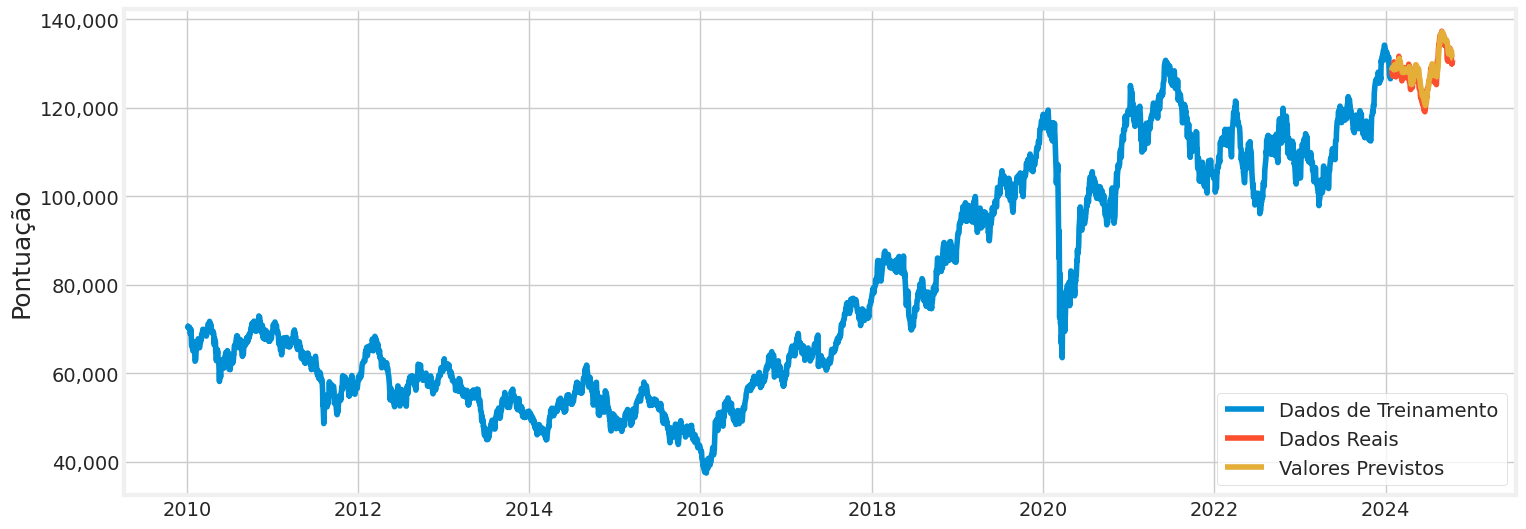

In [822]:
# Plot the data
# Contain the first 95% of the data
train = data[:training_data_len]
# Contain the remaining 5% of the data
valid = data[training_data_len:]
# Add predictions to the validation set
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6), facecolor='white')
# ax.grid(True, color='lightgray')
# Add thousands separator to x-axis
ay = plt.gca()  # Get the current Axes object
ay.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.title('')
plt.xlabel('')
plt.ylabel('Pontuação', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Dados de Treinamento', 'Dados Reais', 'Valores Previstos'], loc='lower right')
plt.show()

In [823]:
# Contain the first 95% of the data
train

,Close
Date,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0
...,...
2024-01-19,127636.0
2024-01-22,126602.0
2024-01-23,128263.0


In [824]:
# Contain the remaining 5% of the data
valid

,Close,Predictions
Date,,
2024-01-26,128967.000000,128460.671875
2024-01-29,128503.000000,128870.531250
2024-01-30,127402.000000,129149.304688
2024-01-31,127752.000000,129045.367188
2024-02-01,128481.000000,128917.046875
...,...,...
2024-10-09,129962.000000,132650.015625
2024-10-10,130353.000000,132059.296875
2024-10-11,129992.000000,131588.765625


In [825]:
ax.grid(True, color='lightgray') # Show the Close (actual) and predicted prices
valid

,Close,Predictions
Date,,
2024-01-26,128967.000000,128460.671875
2024-01-29,128503.000000,128870.531250
2024-01-30,127402.000000,129149.304688
2024-01-31,127752.000000,129045.367188
2024-02-01,128481.000000,128917.046875
...,...,...
2024-10-09,129962.000000,132650.015625
2024-10-10,130353.000000,132059.296875
2024-10-11,129992.000000,131588.765625


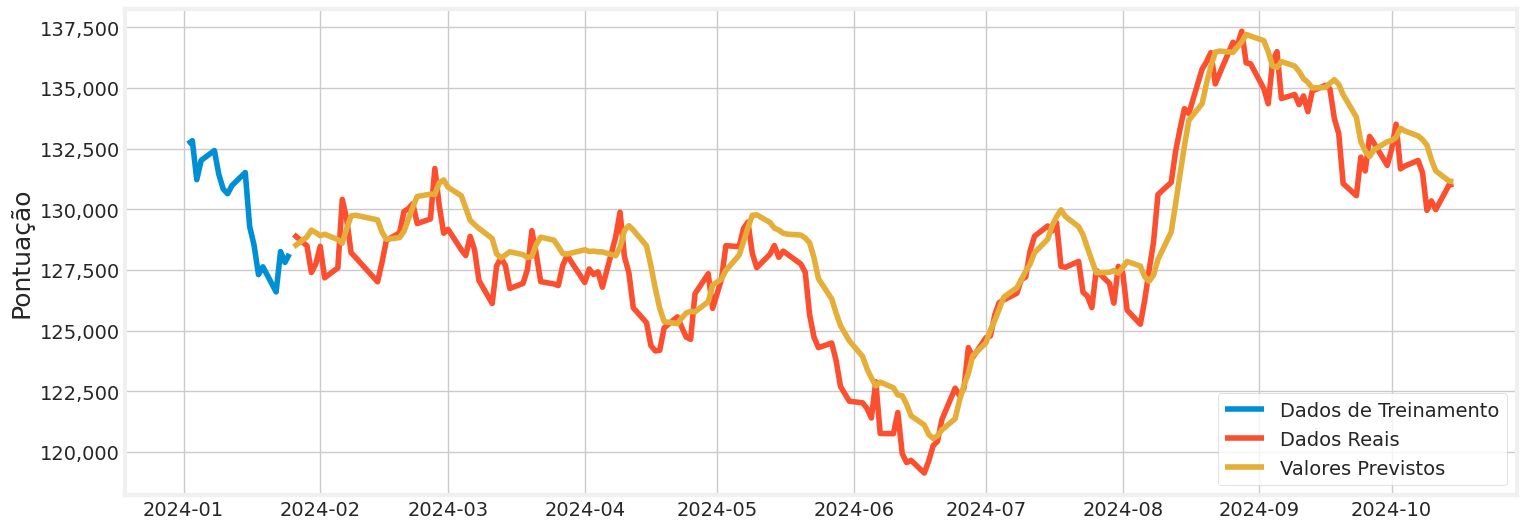

In [826]:
# Plot the "Predictions" data - 2024 only
# Visualize the data
plt.figure(figsize=(16,6), facecolor='white')
# ax.grid(True, color='lightgray')

# Filter data for 2024
train_2024 = train[train.index.year == 2024]
valid_2024 = valid[valid.index.year == 2024]

# Add thousands separator to x-axis
ay = plt.gca()  # Get the current Axes object
ay.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))
plt.title('')
plt.xlabel('')
plt.ylabel('Pontuação', fontsize=18)
plt.plot(train_2024['Close'])
plt.plot(valid_2024[['Close', 'Predictions']])
plt.legend(['Dados de Treinamento', 'Dados Reais', 'Valores Previstos'], loc='lower right')
plt.show()

In [827]:
# # Assuming 'valid' DataFrame has columns 'Close' (actual) and 'Predictions' (predicted)
# plt.figure(figsize=(12, 6))
# plt.plot(valid['Close'], label='Actual Price', color='blue')
# plt.plot(valid['Predictions'], label='Predicted Price', color='red')

# plt.title('IBOVESPA Closing Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Price')

# plt.legend()
# plt.grid(True, color='lightgray')

# plt.show()

In [828]:
# Generate R² Score
# y_test: This contains the actual closing prices from the dataset (the 5% reserved for testing)
# predictions: These are the predicted closing prices generated by the model.
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

R² Score: 0.8712


In [829]:
y_test

array([[128967.       ],
       [128503.       ],
       [127402.       ],
       [127752.       ],
       [128481.       ],
       [127182.       ],
       [127593.       ],
       [130416.       ],
       [129608.       ],
       [128217.       ],
       [128026.       ],
       [127018.       ],
       [127804.       ],
       [128726.       ],
       [129036.       ],
       [129916.       ],
       [130032.       ],
       [130241.       ],
       [129419.       ],
       [129609.       ],
       [131689.       ],
       [130155.       ],
       [129020.       ],
       [129180.       ],
       [128341.       ],
       [128098.       ],
       [128890.       ],
       [128340.       ],
       [127071.       ],
       [126124.       ],
       [127668.       ],
       [128006.       ],
       [127690.       ],
       [126742.       ],
       [126954.       ],
       [127529.       ],
       [129125.       ],
       [128159.       ],
       [127027.       ],
       [126931.       ],


In [830]:
predictions

array([[128460.67 ],
       [128870.53 ],
       [129149.305],
       [129045.37 ],
       [128917.05 ],
       [128978.68 ],
       [128759.11 ],
       [128604.6  ],
       [129211.414],
       [129729.5  ],
       [129763.49 ],
       [129569.766],
       [129069.84 ],
       [128772.54 ],
       [128838.11 ],
       [129098.92 ],
       [129600.43 ],
       [130099.65 ],
       [130535.49 ],
       [130631.26 ],
       [130627.18 ],
       [131097.67 ],
       [131217.75 ],
       [130913.695],
       [130564.91 ],
       [130056.67 ],
       [129554.97 ],
       [129375.5  ],
       [129217.37 ],
       [128803.22 ],
       [128171.96 ],
       [128005.79 ],
       [128124.67 ],
       [128255.97 ],
       [128137.13 ],
       [128018.61 ],
       [128066.9  ],
       [128563.48 ],
       [128856.23 ],
       [128736.234],
       [128470.266],
       [128183.96 ],
       [128161.05 ],
       [128338.234],
       [128270.24 ],
       [128283.06 ],
       [128254.72 ],
       [12824

# Testes adicionais (sem relevância ao tech challenge)

##  1º Teste Adicional {acurácia R² Score: -0.0224}- (Tech-Challenge inicia aqui) - Tensorflow - Keras (deep learning library)

In [831]:
Comentar essa linha para continuar a execução dos códigos adicionais (sem relevância ao tech-challenge)
print("Atenção! A continuação da execução do código por aqui pode levar algum tempo.")

SyntaxError: invalid syntax (<ipython-input-831-a6e45fdb276c>, line 1)

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr
# For time stamps
from datetime import datetime
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Libraries for the radio button (to choose between yahoo-finance and br.investing)
!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import classification_report,confusion_matrix
import math
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # import necessary functions
import numpy as np # this line was implicitly missing.
import plotly.graph_objects as go

In [ ]:
# URL to br.investing database containing IBOVESPA data:
url = 'https://raw.githubusercontent.com/kaulirio/FIAP-Tech-Challenge/refs/heads/main/base_dados_IBOVESPA_investing_2010-2024.csv'
# Load the CSV file into a DataFrame
df_investing = pd.read_csv(url)
# df_investing['Data'] = pd.to_datetime(df_investing['Data'], format='%d.%m.%Y')
df_investing['Data'] = pd.to_datetime(df_investing['Data'], errors='coerce')  # Handle potential errors
df_investing = df_investing.sort_values(by=['Data'], ascending=True)
# Reset the index
df_investing = df_investing.reset_index(drop=True)  # drop=True to avoid old index as a column
# Filter to obtain only start='2010-01-01', end='2024-07-31
df_investing = df_investing[(df_investing['Data'] >= '2010-01-01') & (df_investing['Data'] <= '2024-07-30')]
df_investing = df_investing.rename(columns={'Data': 'Date', 'Último': 'Close', 'Vol.': 'Volume'})  # Rename columns
df_investing.columns

In [ ]:
# Load the IBOVESPA data
df = yf.download('^BVSP', start='2010-01-01', end='2024-07-31', progress=False)

In [ ]:
df_investing.columns

In [ ]:
df.columns

In [ ]:
# Columns to drop
columns_to_drop = ['_merge', 'Volume_x', 'Close_x', 'Volume_y', 'Close_y']

# Drop columns only if they exist in the DataFrame
df_investing = df_investing.drop(columns=[col for col in columns_to_drop if col in df_investing.columns])

# Remove the index and make 'Date' a regular column again
# df_investing = df_investing.reset_index()

# Check if 'Date' is already a column (indicating index has been reset)
if 'Date' not in df_investing.columns:
    df_investing = df_investing.reset_index()  # Reset index only if 'Date' is not a column

# Harmonize br.investing and Yahoo Finance datasets: Removing extra and adding missing lines
merged_df = pd.merge(df_investing, df, on=['Date'], how='outer', indicator=True)

# Columns to drop
columns_to_drop = [ 'Volume_x', 'Close_x', 'Volume_y', 'Close_y']

# Drop columns only if they exist in the DataFrame
merged_df = merged_df.drop(columns=[col for col in columns_to_drop if col in merged_df.columns])

# Identify lines in df_investing that are not in df
extra_lines_df_investing = merged_df[merged_df['_merge'] == 'left_only']

# Remove extra lines from df_investing
df_investing = df_investing[~df_investing['Date'].isin(extra_lines_df_investing['Date'])]

# Identify lines in df that are not in df_investing
merged_df = pd.merge(df, df_investing, on=['Date'], how='outer', indicator=True)

# Identify lines in df_investing that are not in df
extra_lines_df = merged_df[merged_df['_merge'] == 'left_only']

# Add missing lines from df (Yahoo finance) to df_investing (br.investing)
df_investing = pd.merge(df_investing, extra_lines_df, on=['Date'], how='outer')
df_investing.set_index('Date', inplace=True)
df_investing

In [ ]:
# Confirm Date Column Alignment Between df and df_investing
date_comparison = df.index.equals(df_investing.index)

if date_comparison:
    print("All values in the 'Date' column are the same in both DataFrames.")
else:
    print("There are differences in the 'Date' column between the DataFrames.")

In [ ]:
# User can choose between datasets from yahoo finance and
# br.investing (as requested for Tech Challenge Fase 2)

# Create option button for dataset choice
dataset_options = ['Yahoo!-finance', 'br.investing']
dataset_dropdown = widgets.Dropdown(
    options=dataset_options,
    value=dataset_options[0],  # Set default value
    description='Dataset:',
    disabled=False,
)
# Function to handle button click
def on_change(b):
    global df_final # Access global variable

    # Get the selected dataset and column
    dataset_choice = dataset_dropdown.value

    # Update df_final
    if dataset_choice == "Yahoo!-finance":
        df_final = df
    elif dataset_choice == "br.investing":
        df_final = df_investing
        # Execute the JavaScript code
    else:
        print("Opção de conjunto de dados inválida. Por favor, selecione: 'Yahoo!-finance' ou 'br.investing'.")
        df_final = None
        return  # Stop execution if dataset is invalid

# Observe changes in dropdown values
dataset_dropdown.observe(on_change, names='value')

# Display the buttons
display(dataset_dropdown)

# Seleciona a base do Yahoo! finance como padrão
df_final = df

##  2º Teste Adicional (continuação) {acurácia R² Score: 0.98} obteve-se melhor acurácia porém predição (model.make_future_dataframe) não funcionou - Evaluate model generalization by extending the IBOVESPA DataFrame by one month, enabling auto-regression (forecast not possible due to error/limitation in teh forecastin tool)  - 3rd NeuralProphet test **

In [ ]:
# Load the Dow Jones Industrial Average data
# Market Influence: The DJIA has a long history and is often seen as a
# barometer of overall market health, making it very influential, especially in traditional finance. (extended until Ago/2024)
df_dji_extended = yf.download('^DJI', start='2010-01-01', end='2024-08-31', progress=False)

# Load the IBOVESPA data (extended until Ago/2024)
df_extended = yf.download('^BVSP', start='2010-01-01', end='2024-08-31', progress=False)

# Aligning the Dow Jones and IBOVESPA DataFrames by Date
common_dates = df_extended.index.intersection(df_dji_extended.index)  # Find common dates
df_dji_extended = df_dji_extended.loc[common_dates]  # Filter df_dji_extended using common dates
df_dji_extended

ibovespa_extended = df_extended.reset_index()
ibovespa_extended = ibovespa_extended[['Date', 'Close']]
ibovespa_extended.columns = ['ds', 'y']

In [ ]:
# Plot extended Dow-Jones data
plt.figure(figsize=(12, 6))
#Index is automatically added to the x-axis
plt.plot( df_dji_extended['Close'], label='Actual', c='g')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Dow Jones - Extended until Ago/2024')
plt.show()

In [ ]:
# Plot extended IBOVESPA data
plt.figure(figsize=(12, 6))
plt.plot(ibovespa_extended['ds'], ibovespa_extended['y'], label='Actual', c='g')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Ibovespa - Extended until Ago/2024')
plt.show()

In [ ]:
df_dji_extended = df_dji_extended.reset_index()  # Reset the index to make 'Date' a regular column
df_dji_extended = df_dji_extended.rename(columns={'Date': 'ds', 'Close': 'dow_jones'})
df_dji_extended = df_dji_extended[['ds', 'dow_jones']]
df_dji_extended

#Improving IBOVESPA (extended until Ago/2024) Index Predictions by Including the Dow Jones stock-index as a Lagged Regressor"
ibovespa_extended = pd.merge(ibovespa_extended, df_dji_extended, on='ds', how='left')
ibovespa_extended

In [ ]:
#model = NeuralProphet(quantiles=[0.05, 0.95])
m_extended = NeuralProphet(
# n_lags Auto-Regression: uses observations from 5 previous time steps as input
    n_lags=5,
# Trend changepoints are points in time where the trend changes, below you select how many points are considered (previous)
    n_changepoints=5, #(around 1 week)
# Disable seasonality components
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
# Split the dataset into training and testing sets, with 80% for training and 20% for testing the ML model.
df_train_extended, df_test_extended = m_extended.split_df(ibovespa_extended, freq="D", valid_p= 0.2)

print("Dataset size:", len(ibovespa_extended))
print("Train dataset size:", len(df_train_extended))
print("Testing dataset size:", len(df_test_extended))

# Add the dow-jones stock market index as lagged regressor
m_extended.add_lagged_regressor("dow_jones", n_lags=5)

# Add Brazilian holidays to the model
m_extended.add_country_holidays(country_name='Brazil')

metrics_extended = m_extended.fit(df_train_extended, freq="D", validation_df=df_test_extended, progress="bar")

In [ ]:
# Model performance metrics/stats
metrics_extended.tail(1)

In [ ]:
# forecast_extended = m_extended.predict(df_train_extended)
forecast_extended = m_extended.predict(ibovespa_extended)

m_extended.set_plotting_backend("plotly-static")
m_extended.plot(forecast_extended)

In [ ]:
m_extended.plot_parameters()

In [ ]:
# Dow Jones as a Predictor in IBOVESPA (extended until Ago/2024) Autoregression
m_extended.plot_components(forecast_extended, components=["autoregression"])

In [ ]:
# Create ds to evalute the model
# Reset dfs
del y_test, y_pred
y_test = test
y_pred = forecast_extended[['ds','yhat1']].copy()
y_pred = y_pred[y_pred['ds'].isin(y_test['ds'].values)]
# Rename 'yhat1' column to 'y'
y_pred = y_pred.rename(columns={'yhat1': 'y'})
y_pred.info()

In [ ]:
# Plotting prediction

#NeuralProphet plotting in Colab is not working as expected, so
fig_pred = go.Figure()

# Add forecast line
fig_pred.add_trace(go.Scatter(x=forecast_extended['ds'],
                         y=forecast_extended['yhat1'],
                         name='Previsao do modelo',
                         mode='lines',
                         line=dict(color='blue')))

# Add actual Ibovespa data line
fig_pred.add_trace(go.Scatter(x=ibovespa_extended['ds'],
                         y=ibovespa_extended['y'],
                         name='Valor Real',
                         mode='lines',
                         line=dict(color='green')))

# Update layout (optional)
fig_pred.update_layout(title='neuralprophet Predictions vs. Actual Ibovespa',
                   xaxis_title='Date',
                   yaxis_title='Close Price')

# Show the plot
fig_pred.show()

In [ ]:
#Avaliando o modelo NeuralProphet

# Calculate performance metrics
mae = mean_absolute_error(y_test['y'], y_pred['y'])
mse = mean_squared_error(y_test['y'], y_pred['y'])
rmse = np.sqrt(mse)
r2 = r2_score(y_test['y'], y_pred['y'])

# Print the scores
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'r2: {r2:.2f}')

## ** 3º Teste Adicional {acurácia R² Score: 0.26} - Evaluating the forecast accuracy the of the model Artificial Neural Networks: Tensorflow & sklearn :**

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
# Set the random numbers to initialize models or perform calculations in neuralprophet
from neuralprophet import set_random_seed
set_random_seed(0)

In [ ]:
# Prepairing the df
# Load the IBOVESPA data
df = yf.download('^BVSP', start='2010-01-01', end='2024-07-31', progress=False)
ibovespa = df
ibovespa.reset_index(inplace=True)
ibovespa = ibovespa[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
ibovespa
# Split data into training and testing sets
train = ibovespa[ibovespa['ds'] < '2023-01-01']
test = ibovespa[ibovespa['ds'] >= '2023-01-01']

In [ ]:
ibovespa.tail()

In [ ]:
ibovespa.info()

In [ ]:
ibovespa.describe()

In [ ]:
ibovespa.corr()

In [ ]:
# Strong correlation between dow-jones and IBOVESPA ('y' column)
sns.heatmap(ibovespa.corr(), annot=True)

In [ ]:
#model = NeuralProphet(quantiles=[0.05, 0.95])
m = Prophet()

# Add Brazilian holidays to the model
m.add_country_holidays(country_name='Brazil')

metrics = m.fit(train)

In [ ]:
# Create future dataframe and make predictions
future = m.make_future_dataframe(periods=580)
forecast = m.predict(future)

# Plot predictions
m.plot(forecast)
plt.title(f"Predicted Stock Price of {ticker} using Prophet")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [ ]:
# Create ds to evalute the model
y_test = test
y_pred = forecast[['ds', 'yhat']].copy()
y_pred['y'] = y_pred['yhat']
y_pred.drop('yhat', axis=1, inplace=True)
y_pred['y'] = y_pred['y'].astype('float64')
y_pred = y_pred[y_pred['ds'].isin(y_test['ds'].values)].copy()
y_test


#Avaliando o modelo NeuralProphet

# Calculate performance metrics
mae = mean_absolute_error(y_test['y'], y_pred['y'])
mse = mean_squared_error(y_test['y'], y_pred['y'])
rmse = np.sqrt(mse)
r2 = r2_score(y_test['y'], y_pred['y'])

# Print the scores
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'r2: {r2:.2f}')

In [ ]:
# Plotting prediction

#NeuralProphet plotting in Colab is not working as expected, so
fig_pred = go.Figure()

# Add forecast line
fig_pred.add_trace(go.Scatter(x=forecast['ds'],
                         y=forecast['yhat'],
                         name='Previsao do modelo',
                         mode='lines',
                         line=dict(color='blue')))

# Add actual Ibovespa data line
fig_pred.add_trace(go.Scatter(x=ibovespa['ds'],
                         y=ibovespa['y'],
                         name='Valor Real',
                         mode='lines',
                         line=dict(color='green')))

# Update layout (optional)
fig_pred.update_layout(title='neuralprophet Predictions vs. Actual Ibovespa',
                   xaxis_title='Date',
                   yaxis_title='Close Price')

# Show the plot
fig_pred.show()